1. Èï∑Áü≠ÊúüË®òÊÜ∂ (Long Short-Term Memory, LSTM)
ÂØ¶È©óË®≠Ë®àÔºö
ÂØ¶È©ó‰∏ÄÔºöClose ÁâπÂæµ - LSTM vs DNN Ê®°ÂûãÊØîËºÉ
ÂØ¶È©ó‰∫åÔºöOHLCV ÁâπÂæµ - LSTM vs DNN Ê®°ÂûãÊØîËºÉ
ÂØ¶È©ó‰∏âÔºöÁ∂úÂêàÊØîËºÉ

In [2]:
#Áí∞Â¢ÉË®≠ÁΩÆËàáÂ•ó‰ª∂ÂÆâË£ù
# ÂåØÂÖ•ÊâÄÈúÄÂ•ó‰ª∂
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
import warnings
import random
import numpy as np
import tensorflow as tf
import os
warnings.filterwarnings('ignore')

# Ë®≠ÂÆöÈö®Ê©üÁ®ÆÂ≠êÔºåÁ¢∫‰øùÁµêÊûúÂèØÈáçÁèæ
RANDOM_SEED = 42

# Colab ÈÄ≤Ë°åmatplotlibÁπ™ÂúñÊôÇÈ°ØÁ§∫ÁπÅÈ´î‰∏≠Êñá
# ‰∏ãËºâÂè∞ÂåóÊÄùÊ∫êÈªëÈ´î‰∏¶ÂëΩÂêçtaipei_sans_tc_beta.ttfÔºåÁßªËá≥ÊåáÂÆöË∑ØÂæë
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# ÊîπstyleË¶ÅÂú®Êîπfont‰πãÂâç
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

print(" Áí∞Â¢ÉË®≠ÁΩÆÂÆåÊàêÔºÅ")

--2025-09-25 04:47:12--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 192.178.210.139, 192.178.210.102, 192.178.210.100, ...
Connecting to drive.google.com (drive.google.com)|192.178.210.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-09-25 04:47:12--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.201.132, 2607:f8b0:4001:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.201.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‚ÄòTaipeiSansTCBeta-Regular.ttf‚Äô

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.08s   

2025-09-2

In [3]:
def set_random_seeds(seed=RANDOM_SEED):
    """
    Ë®≠ÂÆöÊâÄÊúâÁõ∏ÈóúÂ•ó‰ª∂ÁöÑÈö®Ê©üÁ®ÆÂ≠êÔºåÁ¢∫‰øùÂØ¶È©óÂèØÈáçÁèæ

    ÁÇ∫‰ªÄÈ∫ºÈúÄË¶ÅË®≠ÂÆöÂ§öÂÄãÁ®ÆÂ≠êÔºü
    - Python random: ÂΩ±ÈüøË≥áÊñôÊâì‰∫Ç„ÄÅÈö®Ê©üÊäΩÊ®£
    - NumPy: ÂΩ±ÈüøÊ¨äÈáçÂàùÂßãÂåñ„ÄÅË≥áÊñôÂàÜÂâ≤
    - TensorFlow: ÂΩ±ÈüøÁ∂≤Ë∑ØÊ¨äÈáçÂàùÂßãÂåñ„ÄÅdropoutÁ≠â
    - OSÁí∞Â¢ÉËÆäÊï∏: Á¢∫‰øùGPUÈÅãÁÆó‰πüÊòØÁ¢∫ÂÆöÊÄßÁöÑ
    """
    print(f"üéØ Ë®≠ÂÆöÈö®Ê©üÁ®ÆÂ≠êÁÇ∫ {seed}ÔºåÁ¢∫‰øùÂØ¶È©óÂèØÈáçÁèæ...")

    # 1. Python ÂÖßÂª∫ random
    random.seed(seed)
    print(f"   ‚úì Python random.seed({seed})")

    # 2. NumPy Èö®Ê©üÁ®ÆÂ≠ê
    np.random.seed(seed)
    print(f"   ‚úì NumPy np.random.seed({seed})")

    # 3. TensorFlow Èö®Ê©üÁ®ÆÂ≠ê
    tf.random.set_seed(seed)
    print(f"   ‚úì TensorFlow tf.random.set_seed({seed})")

    # 4. Ë®≠ÂÆöÁí∞Â¢ÉËÆäÊï∏Á¢∫‰øùGPUÈÅãÁÆóÁ¢∫ÂÆöÊÄß
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    print(f"   ‚úì Áí∞Â¢ÉËÆäÊï∏ PYTHONHASHSEED & TF_DETERMINISTIC_OPS")

    # 5. Ë®≠ÂÆö TensorFlow GPU Á¢∫ÂÆöÊÄßÈÅãÁÆó
    try:
        # TensorFlow 2.8+ ÁöÑÊñπÊ≥ï
        tf.config.experimental.enable_op_determinism()
        print(f"   ‚úì TensorFlow GPU Á¢∫ÂÆöÊÄßÈÅãÁÆóÂ∑≤ÂïüÁî®")
    except AttributeError:
        # ËºÉËàäÁâàÊú¨ÁöÑ TensorFlow
        print(f"   ‚ö†Ô∏è TensorFlow ÁâàÊú¨ËºÉËàäÔºåÈÉ®ÂàÜÁ¢∫ÂÆöÊÄßË®≠ÂÆöÂèØËÉΩÁÑ°Êïà")

    print("‚úÖ Èö®Ê©üÁ®ÆÂ≠êË®≠ÂÆöÂÆåÊàêÔºÅÊØèÊ¨°Âü∑Ë°åÁµêÊûúÂ∞áÂÆåÂÖ®‰∏ÄËá¥")

# Âü∑Ë°åÁ®ÆÂ≠êË®≠ÂÆö
set_random_seeds(RANDOM_SEED)

üéØ Ë®≠ÂÆöÈö®Ê©üÁ®ÆÂ≠êÁÇ∫ 42ÔºåÁ¢∫‰øùÂØ¶È©óÂèØÈáçÁèæ...
   ‚úì Python random.seed(42)
   ‚úì NumPy np.random.seed(42)
   ‚úì TensorFlow tf.random.set_seed(42)
   ‚úì Áí∞Â¢ÉËÆäÊï∏ PYTHONHASHSEED & TF_DETERMINISTIC_OPS
   ‚úì TensorFlow GPU Á¢∫ÂÆöÊÄßÈÅãÁÆóÂ∑≤ÂïüÁî®
‚úÖ Èö®Ê©üÁ®ÆÂ≠êË®≠ÂÆöÂÆåÊàêÔºÅÊØèÊ¨°Âü∑Ë°åÁµêÊûúÂ∞áÂÆåÂÖ®‰∏ÄËá¥


In [6]:
def get_stock_data(stock_id='Àá3017.TW', start_date='2020-01-01', end_date='2025-9-25'):
    """
    Áç≤ÂèñËÇ°Á•®Ê≠∑Âè≤Ë≥áÊñô

    ÂèÉÊï∏Ë™™ÊòéÔºö
    - stock_id: ËÇ°Á•®‰ª£Á¢ºÔºàÂè∞ËÇ°Ê†ºÂºèÔºöXXXX.TWÔºâ
    - start_date: ÈñãÂßãÊó•Êúü
    - end_date: ÁµêÊùüÊó•Êúü

    ËøîÂõûÔºöÊ∏ÖÁêÜÂæåÁöÑËÇ°Á•®Ë≥áÊñôDataFrame
    """
    print(f" Ê≠£Âú®Áç≤Âèñ {stock_id} ÁöÑÊ≠∑Âè≤Ë≥áÊñô...")

    start = dt.datetime.strptime(start_date, '%Y-%m-%d')
    end = dt.datetime.strptime(end_date, '%Y-%m-%d')

    stock_data = yf.download(stock_id, start=start, end=end)
    stock_data = stock_data.reset_index()
    stock_data["Date"] = pd.to_datetime(stock_data["Date"])
    stock_data.set_index("Date", inplace=True)

    print(f" ÊàêÂäüÁç≤Âèñ {len(stock_data)} Á≠ÜË≥áÊñô")
    print(f" Ë≥áÊñôÂçÄÈñì: {stock_data.index[0].date()} Âà∞ {stock_data.index[-1].date()}")

    return stock_data

# Âü∑Ë°åË≥áÊñôÁç≤Âèñ
stock_data = get_stock_data('3017.TW') # stock_id='3017.TW', start_date='2020-01-01', end_date='2025-09-25'

# Ë≥áÊñôÊé¢Á¥¢ÂàÜÊûê
print(f"\n Â•áÈãêËÇ°ÂÉπË≥áÊñôÊ¶ÇË¶Ω:")
print(f"Ë≥áÊñôÂΩ¢ÁãÄ: {stock_data.shape}")
print(f"Ê¨Ñ‰ΩçÂêçÁ®±: {list(stock_data.columns)}")
print(f"\nÂâç5Á≠ÜË≥áÊñô:")
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

 Ê≠£Âú®Áç≤Âèñ 3017.TW ÁöÑÊ≠∑Âè≤Ë≥áÊñô...
 ÊàêÂäüÁç≤Âèñ 1392 Á≠ÜË≥áÊñô
 Ë≥áÊñôÂçÄÈñì: 2020-01-02 Âà∞ 2025-09-24

 Â•áÈãêËÇ°ÂÉπË≥áÊñôÊ¶ÇË¶Ω:
Ë≥áÊñôÂΩ¢ÁãÄ: (1392, 5)
Ê¨Ñ‰ΩçÂêçÁ®±: [('Close', '3017.TW'), ('High', '3017.TW'), ('Low', '3017.TW'), ('Open', '3017.TW'), ('Volume', '3017.TW')]

Ââç5Á≠ÜË≥áÊñô:
Price           Close       High        Low       Open    Volume
Ticker        3017.TW    3017.TW    3017.TW    3017.TW   3017.TW
Date                                                            
2020-01-02  37.129871  38.562955  36.912736  37.347006  34206410
2020-01-03  35.827072  37.260156  35.696791  37.173302  12411129
2020-01-06  34.654552  35.436235  34.567698  35.436235   8067454
2020-01-07  34.437420  35.088818  34.090004  34.915113   5874937
2020-01-08  34.046574  34.915110  34.046574  34.611121   7095160


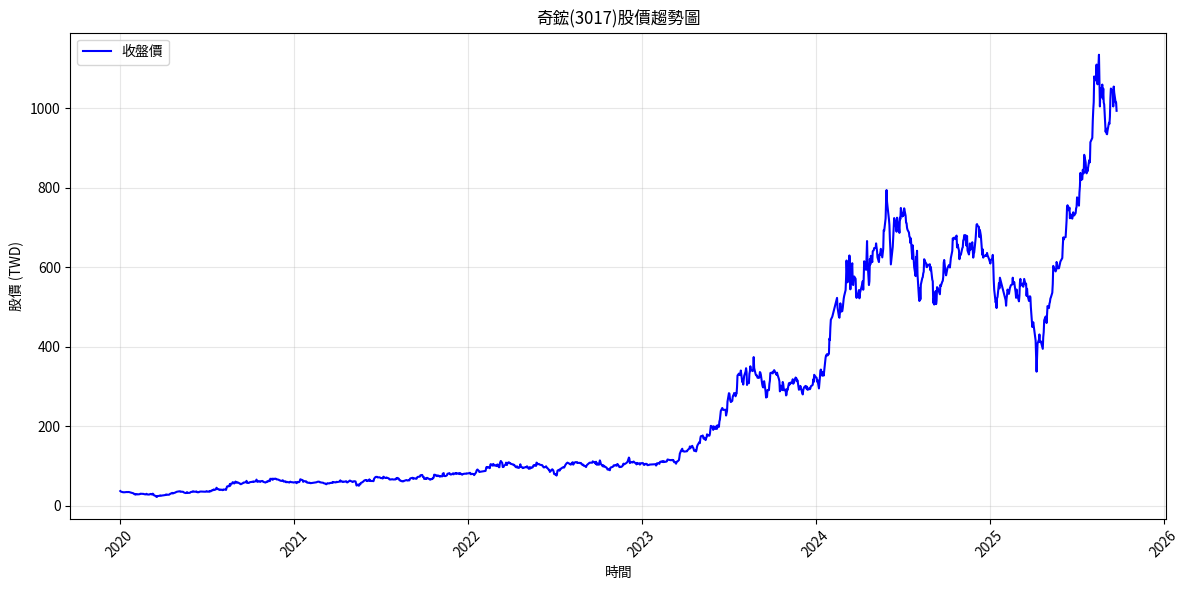

In [7]:
# Ë¶ñË¶∫ÂåñËÇ°ÂÉπË∂®Âã¢
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Êî∂Áõ§ÂÉπ', color='blue')
plt.title('Â•áÈãê(3017)ËÇ°ÂÉπË∂®Âã¢Âúñ')
plt.xlabel('ÊôÇÈñì')
plt.ylabel('ËÇ°ÂÉπ (TWD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ÁâπÂæµÂ∑•Á®ã:Close‰ª•ÂèäOHLCV

In [9]:
def prepare_close_only_features(data):
    """
    ÊñπÊ°à‰∏ÄÔºöÂÉÖ‰ΩøÁî®Êî∂Áõ§ÂÉπÁâπÂæµ

    Ë®≠Ë®àÁêÜÂøµÔºö
    - ÊúÄÁ∞°ÂñÆÁöÑÁâπÂæµË®≠Ë®à
    - ÈÅøÂÖçÁâπÂæµÈñìÂÖ±Á∑öÊÄßÂïèÈ°å
    - Ê∏¨Ë©¶Ê®°ÂûãÂ∞çÂñÆ‰∏ÄÊôÇÂ∫èÁöÑÂ≠∏ÁøíËÉΩÂäõ
    """
    print("üìâ Ê∫ñÂÇô Close Only ÁâπÂæµ...")

    df = data[['Close']].copy()
    df = df.dropna()

    # ËôïÁêÜÂ§öÂ±§Á¥¢Âºï
    if isinstance(df.columns[0], tuple):
        df.columns = [col[0] for col in df.columns]

    print(f" Close Only ÁâπÂæµÊ∫ñÂÇôÂÆåÊàêÔºåÂΩ¢ÁãÄ: {df.shape}")
    return df, ['Close']

def prepare_ohlcv_features(data):
    """
    ÊñπÊ°à‰∫åÔºö‰ΩøÁî®ÂÆåÊï¥ OHLCV ÁâπÂæµ

    Ë®≠Ë®àÁêÜÂøµÔºö
    - Open: Â∏ÇÂ†¥ÈñãÁõ§ÊÉÖÁ∑í
    - High/Low: Áï∂Êó•Ê≥¢ÂãïÁØÑÂúç
    - Close: Êî∂Áõ§ÂÖ±Ë≠òÂÉπÊ†º
    - Volume: ‰∫§ÊòìÈáèÔºàÂ∏ÇÂ†¥Ê¥ªË∫çÂ∫¶Ôºâ
    """
    print(" Ê∫ñÂÇô OHLCV ÂÆåÊï¥ÁâπÂæµ...")

    #feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    feature_columns = ['Open', 'High', 'Low','Close','Volume']
    df = data[feature_columns].copy()
    df = df.dropna()

    if isinstance(df.columns[0], tuple):
        df.columns = [col[0] for col in df.columns]

    print(f" OHLCV ÁâπÂæµÊ∫ñÂÇôÂÆåÊàêÔºåÂΩ¢ÁãÄ: {df.shape}")
    print(f"ÁâπÂæµÁ∂≠Â∫¶: {feature_columns}")
    return df, feature_columns

Ë≥áÊñôÂâçËôïÁêÜ

In [10]:
def create_dataset_single_step(dataset, window_size, target_col_idx=0):
    """
    Âª∫Á´ãÊôÇÂ∫èÈ†êÊ∏¨Ë≥áÊñôÈõÜÔºàÊªëÂãïË¶ñÁ™óÊ≥ïÔºâ

    ÊôÇÂ∫èÂª∫Ê®°Ê†∏ÂøÉÊ¶ÇÂøµÔºö
    - ‰ΩøÁî®Ê≠∑Âè≤Ë≥áÊñôÈ†êÊ∏¨Êú™‰æÜ
    - ÊªëÂãïË¶ñÁ™ó‰øùÊåÅÊôÇÂ∫è‰æùË≥¥ÊÄß
    - ÂñÆÊ≠•È†êÊ∏¨ÔºàÈ†êÊ∏¨‰∏ã‰∏ÄÊúüÔºâ
    """
    X, y = [], []

    print(f" Âª∫Á´ãÊôÇÂ∫èË≥áÊñôÈõÜÔºåË¶ñÁ™óÂ§ßÂ∞è: {window_size} Â§©")

    for i in range(len(dataset) - window_size):
        # Ëº∏ÂÖ•ÔºöÈÅéÂéªwindow_sizeÂ§©ÁöÑÊâÄÊúâÁâπÂæµ
        X.append(dataset[i:i + window_size, :])
        # ÁõÆÊ®ôÔºö‰∏ã‰∏ÄÂ§©ÁöÑÊî∂Áõ§ÂÉπ
        y.append(dataset[i + window_size, target_col_idx])

    X = np.array(X)
    y = np.array(y)

    print(f" ÊôÇÂ∫èË≥áÊñôÈõÜÂª∫ÊßãÂÆåÊàê")
    print(f"   Ëº∏ÂÖ•ÂΩ¢ÁãÄ X: {X.shape} (Ê®£Êú¨Êï∏, ÊôÇÈñìÊ≠•Èï∑, ÁâπÂæµÊï∏)")
    print(f"   ÁõÆÊ®ôÂΩ¢ÁãÄ y: {y.shape}")

    return X, y

def prepare_data(features_data, window_size, target_col_name='Close'):
    """
    ÂÆåÊï¥Ë≥áÊñôÊ∫ñÂÇôÁÆ°ÈÅì

    ÊµÅÁ®ãÔºöÁâπÂæµÈÅ∏Êìá ‚Üí Ë≥áÊñôÂàÜÂâ≤ ‚Üí Ê≠£Ë¶èÂåñ ‚Üí ÊôÇÂ∫èÂª∫Êßã
    """
    print(f"\n Ê∫ñÂÇô {target_col_name} È†êÊ∏¨Ë≥áÊñô...")

    # 1. ÊâæÂà∞ÁõÆÊ®ôÊ¨Ñ‰ΩçÁ¥¢Âºï
    feature_columns = features_data.columns.tolist()

    def extract_column_name(col):
        if isinstance(col, tuple):
            return col[0]
        return str(col)

    column_names = [extract_column_name(col) for col in feature_columns]

    # Êô∫ËÉΩÂ∞ãÊâæÊî∂Áõ§ÂÉπÊ¨Ñ‰Ωç
    if target_col_name in column_names:
        target_col_idx = column_names.index(target_col_name)
    elif 'Close' in column_names:
        target_col_idx = column_names.index('Close')
        target_col_name = 'Close'
    else:
        target_col_idx = len(feature_columns) - 1
        target_col_name = column_names[target_col_idx]

    print(f" ÁõÆÊ®ôÊ¨Ñ‰Ωç: {target_col_name} (Á¥¢Âºï: {target_col_idx})")

    # 2. ÊôÇÂ∫èÂàÜÂâ≤Ôºö‰øùÊåÅÊôÇÈñìÈ†ÜÂ∫è
    train_size = int(len(features_data) * 0.8)
    train_data = features_data[:train_size]
    test_data = features_data[train_size:]

    print(f" ÊôÇÂ∫èÂàÜÂâ≤: Ë®ìÁ∑¥ {len(train_data)} Á≠ÜÔºåÊ∏¨Ë©¶ {len(test_data)} Á≠Ü")

    # 3. ÁâπÂæµÊ®ôÊ∫ñÂåñ
    """ ÁÇ∫‰ªÄÈ∫ºË¶ÅÊ®ôÊ∫ñÂåñ (MinMaxScaler)?

     Êï∏ÂÄºÁØÑÂúçÂ∑ÆÁï∞Â∑®Â§ß:
     ËÇ°ÂÉπÔºöÂèØËÉΩÂú® 100-600 TWD ÁØÑÂúç
     Êàê‰∫§ÈáèÔºöÂèØËÉΩÂú® 1000-50000000 ËÇ°ÁØÑÂúç
     ‰∏çÊ®ôÊ∫ñÂåñÁöÑË©±ÔºåÊàê‰∫§ÈáèÊúÉ"Â£ìÂÄí"ËÇ°ÂÉπÁâπÂæµ

     Á•ûÁ∂ìÁ∂≤Ë∑ØÁöÑÊï∏Â≠∏ÈúÄÊ±Ç:
     Ê¢ØÂ∫¶‰∏ãÈôçÈúÄË¶ÅÂêÑÁâπÂæµÂú®Áõ∏‰ººÂ∞∫Â∫¶‰∏ä
     ÊøÄÊ¥ªÂáΩÊï∏(ReLU/Sigmoid)Âú®ÁâπÂÆöÁØÑÂúçÂÖßÊïàÊûúÊúÄÂ•Ω
     ÈÅøÂÖçÊ¨äÈáçÊõ¥Êñ∞ÊôÇÊüê‰∫õÁâπÂæµË¢´ÂøΩÁï•

     Èò≤Ê≠¢Êï∏ÂÄºÂïèÈ°å:
     Â§ßÊï∏ÂÄºÂèØËÉΩÂ∞éËá¥Ê¢ØÂ∫¶ÁàÜÁÇ∏
     Â∞èÊ¢ØÂ∫¶ÂèØËÉΩÂ∞éËá¥Â≠∏ÁøíÂÅúÊªû
     Ê®ôÊ∫ñÂåñËÆìÂ≠∏ÁøíÈÅéÁ®ãÊõ¥Á©©ÂÆö
    """
    scaler = MinMaxScaler(feature_range=(0, 1))


    train_scaled = scaler.fit_transform(train_data) # Ë®ìÁ∑¥ÈõÜÔºöÂ≠∏ÁøíÂèÉÊï∏ + ÊáâÁî®ËΩâÊèõ
    test_scaled = scaler.transform(test_data) # Ê∏¨Ë©¶ÈõÜÔºöÂè™ÊáâÁî®ËΩâÊèõÔºå‰∏çÈáçÊñ∞Â≠∏ÁøíÂèÉÊï∏

    """
    ÁÇ∫‰ªÄÈ∫º‰∏çËÉΩÂ∞çÊ∏¨Ë©¶ÈõÜÁî® fit_transformÔºü
    ÊúÉÈÄ†Êàê"Êú™‰æÜË≥áË®äÊ¥©Êºè"
    ÂØ¶ÈöõÈ†êÊ∏¨ÊôÇ‰Ω†‰∏çÁü•ÈÅìÊú™‰æÜË≥áÊñôÁöÑÊúÄÂ§ßÊúÄÂ∞èÂÄº
    ÂøÖÈ†àÁî®Ë®ìÁ∑¥ÊúüÁöÑÁµ±Ë®àÈáè‰æÜÊ®ôÊ∫ñÂåñÊ∏¨Ë©¶Ë≥áÊñô
    """
    print(" MinMax Ê≠£Ë¶èÂåñÂÆåÊàê (0-1 Á∏ÆÊîæ)")

    # 4. ÊôÇÂ∫èË≥áÊñôÈõÜÂª∫Êßã
    X_train, y_train = create_dataset_single_step(train_scaled, window_size, target_col_idx)
    X_test, y_test = create_dataset_single_step(test_scaled, window_size, target_col_idx)

    return X_train, y_train, X_test, y_test, scaler, train_data, test_data, target_col_idx

def inverse_transform_predictions(scaler, y_true, y_pred, n_features, target_col_idx):
    """
    ÂèçÊ≠£Ë¶èÂåñÔºöÂ∞áÈ†êÊ∏¨ÁµêÊûúËΩâÊèõÂõûÂéüÂßãÂÉπÊ†ºÂ∞∫Â∫¶
    """
    def inverse_transform_target(scaler, y_scaled, n_features, target_col_idx):
        if len(y_scaled.shape) == 1:
            y_scaled = y_scaled.reshape(-1, 1)

        dummy = np.zeros((len(y_scaled), n_features))
        dummy[:, target_col_idx] = y_scaled.flatten()
        dummy_inv = scaler.inverse_transform(dummy)
        return dummy_inv[:, target_col_idx]

    y_true_actual = inverse_transform_target(scaler, y_true, n_features, target_col_idx)
    y_pred_actual = inverse_transform_target(scaler, y_pred, n_features, target_col_idx)

    return y_true_actual, y_pred_actual

In [17]:
# Ë®≠ÂÆöË∂ÖÂèÉÊï∏
"""
WINDOW_SIZE = 20 (ÊôÇÈñìÁ™óÂè£Â§ßÂ∞è)
‰ΩúÁî®ÔºöÊ±∫ÂÆöÊ®°ÂûãÁöÑ"Ë®òÊÜ∂Èï∑Â∫¶"
ÂÆöÁæ©Áî®Â§öÂ∞ëÂ§©ÁöÑÊ≠∑Âè≤Ë≥áÊñô‰æÜÈ†êÊ∏¨‰∏ã‰∏ÄÂ§©
ÊéßÂà∂Ëº∏ÂÖ•Ë≥áÊñôÁöÑÊôÇÂ∫èÁ∂≠Â∫¶

Ë™øÊï¥ÊïàÊûú
Â¢ûÂ§ß (30Â§©)ÔºöÊ®°ÂûãËÉΩÁúãÂà∞Êõ¥Èï∑ÁöÑÊ≠∑Âè≤Ë∂®Âã¢Ôºå‰ΩÜË®àÁÆóÈáèÂ¢ûÂä†
Ê∏õÂ∞è (10Â§©)ÔºöÊ®°ÂûãÊõ¥ÈóúÊ≥®ËøëÊúüËÆäÂåñÔºå‰ΩÜÂèØËÉΩÈåØÈÅéÈï∑ÊúüË∂®Âã¢
Â∞çË®òÊÜ∂È´îÂΩ±ÈüøÔºöÁõ¥Êé•ÂΩ±ÈüøËº∏ÂÖ•ÂºµÈáèÂ§ßÂ∞è

=======================================================
EPOCHS = 50 (Ë®ìÁ∑¥Ëº™Êï∏)
‰ΩúÁî®ÔºöÊéßÂà∂Ê®°ÂûãÂ≠∏ÁøíÁöÑ"ÂÖÖÂàÜÁ®ãÂ∫¶"
Ê±∫ÂÆöÊï¥ÂÄãË®ìÁ∑¥Ë≥áÊñôÈõÜË¶ÅË¢´Â≠∏ÁøíÂ§öÂ∞ëÈÅç
ÂΩ±ÈüøÊ®°ÂûãÊòØÂê¶ÂÖÖÂàÜÊì¨ÂêàË≥áÊñô

Ë™øÊï¥ÊïàÊûú
Â¢ûÂä† (100Ëº™)ÔºöÂ≠∏ÁøíÊõ¥ÂÖÖÂàÜÔºå‰ΩÜÂèØËÉΩÈÅéÊì¨Âêà
Ê∏õÂ∞ë (20Ëº™)ÔºöË®ìÁ∑¥Âø´ÈÄüÔºå‰ΩÜÂèØËÉΩÊ¨†Êì¨Âêà
ÂØ¶ÈöõËßÄÂØüÔºöÁúã loss Êõ≤Á∑öÔºå‰∏çÂÜç‰∏ãÈôçÂ∞±Ë©≤ÂÅúÊ≠¢

=======================================================
BATCH_SIZE = 32 (ÊâπÊ¨°Â§ßÂ∞è)
‰ΩúÁî®ÔºöÊ±∫ÂÆöÊØèÊ¨°Ê¨äÈáçÊõ¥Êñ∞‰ΩøÁî®Â§öÂ∞ëÊ®£Êú¨
ÊéßÂà∂Ê¢ØÂ∫¶‰∏ãÈôçÁöÑ"Ê≠•‰ºêÂ§ßÂ∞è"
ÂΩ±ÈüøË®ìÁ∑¥ÈÄüÂ∫¶ÂíåÁ©©ÂÆöÊÄß

ÂÖ∑È´îÂΩ±Èüø
Ë®òÊÜ∂È´î‰ΩøÁî®Ôºö32ÂÄãÊ®£Êú¨ÂêåÊôÇËºâÂÖ•GPUË®òÊÜ∂È´î
Êõ¥Êñ∞È†ªÁéáÔºöÂ¶ÇÊûúÊúâ3200ÂÄãË®ìÁ∑¥Ê®£Êú¨ÔºåÊØèÂÄãepochÊõ¥Êñ∞100Ê¨°Ê¨äÈáç
Ê¢ØÂ∫¶Á©©ÂÆöÊÄßÔºö32ÂÄãÊ®£Êú¨ÁöÑÂπ≥ÂùáÊ¢ØÂ∫¶ÊØî1ÂÄãÊ®£Êú¨Êõ¥ÂèØÈù†

Ë™øÊï¥ÊïàÊûú
Â¢ûÂ§ß (128)ÔºöÊØèÊ¨°Êõ¥Êñ∞Êõ¥Á©©ÂÆöÔºå‰ΩÜÈúÄË¶ÅÊõ¥Â§öË®òÊÜ∂È´î
Ê∏õÂ∞è (8)ÔºöÊõ¥Êñ∞Êõ¥È†ªÁπÅÔºå‰ΩÜÊ¢ØÂ∫¶ÂèØËÉΩ‰∏çÁ©©ÂÆö
Á°¨È´îÈôêÂà∂ÔºöÂèóGPUË®òÊÜ∂È´îÂ§ßÂ∞èÈôêÂà∂
"""
WINDOW_SIZE = 60  # ÊôÇÈñìË¶ñÁ™óÔºö60Â§©
EPOCHS = 70       # Ë®ìÁ∑¥Ëº™Êï∏
BATCH_SIZE = 64   # ÊâπÊ¨°Â§ßÂ∞è

print(f" ÂÖ®ÂüüÂèÉÊï∏Ë®≠ÂÆö:")
print(f"   ÊôÇÈñìË¶ñÁ™ó: {WINDOW_SIZE} Â§©")
print(f"   Ë®ìÁ∑¥Ëº™Êï∏: {EPOCHS}")
print(f"   ÊâπÊ¨°Â§ßÂ∞è: {BATCH_SIZE}")

 ÂÖ®ÂüüÂèÉÊï∏Ë®≠ÂÆö:
   ÊôÇÈñìË¶ñÁ™ó: 60 Â§©
   Ë®ìÁ∑¥Ëº™Êï∏: 70
   ÊâπÊ¨°Â§ßÂ∞è: 64


LSTM‰ª•ÂèäDNNÊû∂Êßã

In [18]:
#Ê∑±Â∫¶Â≠∏ÁøíÊ®°ÂûãÊû∂Êßã
def build_lstm_model(input_shape, output_dim=1, lstm_units=64, dense_units=[64, 32]):
    """
    LSTM Ê®°ÂûãÊû∂ÊßãË®≠Ë®à

    LSTM ÂÑ™Âã¢Ôºö
    - Â∞àÁÇ∫ÊôÇÂ∫èË≥áÊñôË®≠Ë®à
    - ÂÖ∑ÊúâË®òÊÜ∂Ê©üÂà∂ÔºåËÉΩÊçïÊçâÈï∑Êúü‰æùË≥¥
    - Ëß£Ê±∫ÂÇ≥Áµ± RNN ÁöÑÊ¢ØÂ∫¶Ê∂àÂ§±ÂïèÈ°å

    Êû∂ÊßãË®≠Ë®àÔºö
    Input ‚Üí LSTM ‚Üí Dense Layers ‚Üí Output

    Input layer: Êé•Êî∂ (20Â§©, 5ÁâπÂæµ) ÁöÑÊôÇÂ∫èË≥áÊñô
    LSTM layer: ÊèêÂèñÊôÇÂ∫èÁâπÂæµÔºåË®ò‰ΩèÈáçË¶ÅÁöÑÊ≠∑Âè≤Ê®°Âºè
    Dense layers: Â∞áLSTMËº∏Âá∫ÁöÑÊäΩË±°ÁâπÂæµËΩâÊèõÁÇ∫ÊúÄÁµÇÈ†êÊ∏¨
    Output layer: Ëº∏Âá∫ÂñÆ‰∏ÄÈ†êÊ∏¨ÂÄº(ÊòéÂ§©ËÇ°ÂÉπ)

    """
    print(f" Âª∫Á´ã LSTM ÊôÇÂ∫èÈ†êÊ∏¨Ê®°Âûã...")
    print(f"   Ëº∏ÂÖ•ÂΩ¢ÁãÄ: {input_shape}")
    print(f"   LSTM ÂñÆÂÖÉÊï∏: {lstm_units}")
    print(f"   ÂÖ®ÈÄ£Êé•Â±§ÁµêÊßã: {dense_units}")

    model = Sequential(name='LSTM_Stock_Predictor')

    # ÊôÇÂ∫èËº∏ÂÖ•Â±§
    model.add(Input(shape=input_shape))

    # LSTM Â±§ÔºöÊôÇÂ∫èÁâπÂæµÊèêÂèñ
    model.add(LSTM(lstm_units, name='LSTM_Layer',
                   return_sequences=False))  # Âè™ËøîÂõûÊúÄÂæåÊôÇÈñìÊ≠•
    """
    return_sequences=FalseÁöÑÂéüÂõ†
    TrueÔºöËøîÂõûÊØèÂÄãÊôÇÈñìÊ≠•ÁöÑËº∏Âá∫ (20, 64)
    FalseÔºöÂè™ËøîÂõûÊúÄÂæåÊôÇÈñìÊ≠• (64,)
    ÊàëÂÄëÂè™ÈúÄË¶ÅÊúÄÁµÇÁöÑÊôÇÂ∫èÁ∏ΩÁµêÔºå‰∏çÈúÄË¶Å‰∏≠ÈñìÈÅéÁ®ã
    """
    # ÂÖ®ÈÄ£Êé•Â±§ÔºöÈùûÁ∑öÊÄßÁâπÂæµËΩâÊèõ
    for i, units in enumerate(dense_units):
        model.add(Dense(units, activation='relu', name=f'Dense_{i+1}'))
        model.add(Dropout(0.2, name=f'Dropout_{i+1}'))

    # Ëº∏Âá∫Â±§ÔºöÂõûÊ≠∏È†êÊ∏¨
    model.add(Dense(output_dim, activation='linear', name='Output'))
    """
    ËÇ°ÂÉπÈ†êÊ∏¨ÊòØÂõûÊ≠∏‰ªªÂãôÔºå‰∏çÊòØÂàÜÈ°û
    linear = ÁÑ°ÊøÄÊ¥ªÂáΩÊï∏ÔºåÂÖÅË®±‰ªªÊÑèÂØ¶Êï∏Ëº∏Âá∫
    sigmoid/tanh ÊúÉÈôêÂà∂Ëº∏Âá∫ÁØÑÂúçÔºå‰∏çÈÅ©ÂêàËÇ°ÂÉπ
    """
    # Á∑®Ë≠ØÊ®°Âûã
    model.compile(
        optimizer='adam',
        loss='mse',  # ÂõûÊ≠∏‰ªªÂãô‰ΩøÁî® MSE
        metrics=['mae']
    )

    print(" LSTM Ê®°ÂûãÂª∫ÊßãÂÆåÊàê")
    return model

def build_dnn_model(input_shape, output_dim=1, hidden_units=[128, 64, 32]):
    """
    DNN Ê®°ÂûãÊû∂ÊßãË®≠Ë®à

    DNN ÁâπÈªûÔºö
    - ÂÇ≥Áµ±ÂâçÈ•ãÁ∂≤Ë∑Ø
    - Â∞áÊôÇÂ∫èË≥áÊñôÊî§Âπ≥ËôïÁêÜ
    - ÈÄèÈÅéÂ§öÂ±§ÈùûÁ∑öÊÄßËΩâÊèõÂ≠∏ÁøíË§áÈõúÊ®°Âºè

    Êû∂ÊßãË®≠Ë®àÔºö
    Flatten Input ‚Üí Multiple Dense Layers ‚Üí Output

    Êî§Âπ≥ËôïÁêÜÁöÑÂøÖË¶ÅÊÄß
    LSTMËÉΩÁêÜËß£ÊôÇÂ∫èÁµêÊßãÔºåDNN‰∏çËÉΩ
    ÂøÖÈ†àÂ∞á(20Â§©, FÁâπÂæµ)Êî§Âπ≥Êàê20*FÁ∂≠ÂêëÈáè --> (20Â§©, 5ÁâπÂæµ)Êî§Âπ≥Êàê100Á∂≠ÂêëÈáè
    Â§±ÂéªÊôÇÂ∫èË≥áË®äÔºå‰ΩÜËÉΩÂ≠∏ÁøíÁâπÂæµÈñìË§áÈõúÈóú‰øÇ

    ÁÇ∫‰ªÄÈ∫ºÊØîLSTMÂ±§Êï∏Êõ¥Â§öÔºü
    DNNÊ≤íÊúâÂÖßÂª∫ÁöÑÊôÇÂ∫èË®òÊÜ∂ËÉΩÂäõ
    ÈúÄË¶ÅÊõ¥Â§öÂ±§‰æÜÂΩåË£úÁµêÊßãÂä£Âã¢
    ÈÄöÈÅéÊ∑±Â∫¶‰æÜÊ®°Êì¨Ë§áÈõúÁöÑÈùûÁ∑öÊÄßÈóú‰øÇ

    """
    print(f"ü§ñ Âª∫Á´ã DNN Ê∑±Â∫¶È†êÊ∏¨Ê®°Âûã...")

    # Ë®àÁÆóÊî§Âπ≥ÂæåÁ∂≠Â∫¶
    if len(input_shape) == 1:
        input_dim = input_shape[0]
    else:
        input_dim = input_shape[0] * input_shape[1]

    print(f"   Êî§Âπ≥Ëº∏ÂÖ•Á∂≠Â∫¶: {input_dim}")
    print(f"   Èö±ËóèÂ±§ÁµêÊßã: {hidden_units}")

    model = Sequential(name='DNN_Stock_Predictor')

    # Êî§Âπ≥Ëº∏ÂÖ•
    model.add(Input(shape=(input_dim,)))

    # Â§öÂ±§ÂÖ®ÈÄ£Êé•Á∂≤Ë∑Ø
    for i, units in enumerate(hidden_units):
        model.add(Dense(units, activation='relu', name=f'Dense_{i+1}'))
        model.add(Dropout(0.3, name=f'Dropout_{i+1}'))  # ËºÉÈ´ò dropout Èò≤Ê≠¢ÈÅéÊì¨Âêà

    # Ëº∏Âá∫Â±§
    model.add(Dense(output_dim, activation='linear', name='Output'))

    # Á∑®Ë≠ØÊ®°Âûã
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )

    print(" DNN Ê®°ÂûãÂª∫ÊßãÂÆåÊàê")
    return model

In [21]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=EPOCHS, batch_size=BATCH_SIZE):
    """
    Áµ±‰∏ÄÁöÑË®ìÁ∑¥ËàáË©ï‰º∞ÊµÅÁ®ã
    """
    print(f" ÈñãÂßãË®ìÁ∑¥ {model.name}...")
    print(f"   ÂèÉÊï∏Ôºö{epochs} epochs, batch_size={batch_size}")

    # Ë®ìÁ∑¥Ê®°Âûã
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=1,
        shuffle=True
    )

    # Ë©ï‰º∞Ë°®Áèæ
    train_loss = model.evaluate(X_train, y_train, verbose=0)
    test_loss = model.evaluate(X_test, y_test, verbose=0)

    print(f" Ë®ìÁ∑¥ÂÆåÊàêÔºÅ")
    print(f"   Ë®ìÁ∑¥ MSE: {train_loss[0]:.4f}")
    print(f"   Ê∏¨Ë©¶ MSE: {test_loss[0]:.4f}")

    # È†êÊ∏¨
    y_pred = model.predict(X_test, verbose=0)

    return history, train_loss, test_loss, y_pred

ÂØ¶È©ó1 Close ÁâπÂæµ - LSTM vs DNN

In [22]:
def run_close_experiment():
    """
    ÂØ¶È©ó‰∏ÄÔºö‰ΩøÁî®Êî∂Áõ§ÂÉπÁâπÂæµÊØîËºÉ LSTM vs DNN

    ÂØ¶È©óÁõÆÊ®ôÔºö
    - Âú®ÊúÄÁ∞°ÂñÆÁâπÂæµ‰∏ãÊØîËºÉÂÖ©Á®ÆÊ®°ÂûãÊû∂Êßã
    - Ê∏¨Ë©¶ÊôÇÂ∫èÂª∫Ê®° vs ÁâπÂæµÂ≠∏ÁøíÁöÑÂ∑ÆÁï∞
    - Âª∫Á´ãÂü∫Á∑öÊ®°ÂûãÊïàÊûú
    """
    print(" ÂØ¶È©ó‰∏ÄË®≠Ë®àÔºö")
    print("   ÁâπÂæµÔºöÂÉÖÊî∂Áõ§ÂÉπ (Close)")
    print("   Ê®°ÂûãÔºöLSTM vs DNN")
    print("   ÁõÆÊ®ôÔºöÊØîËºÉÊ®°ÂûãÊû∂ÊßãÂ∞çÊôÇÂ∫èÈ†êÊ∏¨ÁöÑÂΩ±Èüø")

    # Ê∫ñÂÇô Close Only ÁâπÂæµ
    close_data, close_features = prepare_close_only_features(stock_data)

    print(f"\n Close ÁâπÂæµË≥áÊñô:")
    print(f"   Ë≥áÊñôÂΩ¢ÁãÄ: {close_data.shape}")
    print(f"   ÁâπÂæµÊï∏Èáè: {len(close_features)}")

    # Ê∫ñÂÇôË®ìÁ∑¥Ë≥áÊñô
    X_train, y_train, X_test, y_test, scaler, train_data, test_data, target_idx = prepare_data(
        close_data, WINDOW_SIZE, 'Close')

    print(f"\n Ë≥áÊñôÈõÜÊ¶ÇË¶Ω:")
    print(f"   Ë®ìÁ∑¥ÈõÜ: X{X_train.shape}, y{y_train.shape}")
    print(f"   Ê∏¨Ë©¶ÈõÜ: X{X_test.shape}, y{y_test.shape}")

    # ÂàùÂßãÂåñÁµêÊûúÂ≠óÂÖ∏
    close_results = {}

    # ========================================================================
    # LSTM Ê®°ÂûãÂØ¶È©ó
    # ========================================================================
    print(f"\n{' LSTM Ê®°ÂûãË®ìÁ∑¥':^50}")
    print("-" * 50)

    # Âª∫Á´ã LSTM Ê®°Âûã
    lstm_model = build_lstm_model((WINDOW_SIZE, len(close_features)), 1)
    lstm_model.summary()

    # Ë®ìÁ∑¥Ë©ï‰º∞
    lstm_history, lstm_train_loss, lstm_test_loss, lstm_pred = train_and_evaluate(
        lstm_model, X_train, y_train, X_test, y_test)

    # ÂèçÊ≠£Ë¶èÂåñÈ†êÊ∏¨ÁµêÊûú
    y_true_actual, lstm_pred_actual = inverse_transform_predictions(
        scaler, y_test, lstm_pred, len(close_features), target_idx)

    # Ë®àÁÆóË©ï‰º∞ÊåáÊ®ô
    lstm_mse = mean_squared_error(y_true_actual, lstm_pred_actual)
    lstm_mae = mean_absolute_error(y_true_actual, lstm_pred_actual)

    print(f" LSTM ÊúÄÁµÇÁµêÊûú:")
    print(f"   MSE: {lstm_mse:.0f}")
    print(f"   MAE: {lstm_mae:.2f}")
    print(f"   RMSE: {np.sqrt(lstm_mse):.2f}")

    # ÂÑ≤Â≠òÁµêÊûú
    close_results['lstm'] = {
        'model': lstm_model,
        'history': lstm_history,
        'y_true': y_true_actual,
        'y_pred': lstm_pred_actual,
        'mse': lstm_mse,
        'mae': lstm_mae,
        'train_loss': lstm_train_loss,
        'test_loss': lstm_test_loss
    }

    # ========================================================================
    # DNN Ê®°ÂûãÂØ¶È©ó
    # ========================================================================
    print(f"\n{' DNN Ê®°ÂûãË®ìÁ∑¥':^50}")
    print("-" * 50)

    # Ê∫ñÂÇô DNN Ëº∏ÂÖ•ÔºàÊî§Âπ≥Ôºâ
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    print(f" DNN Ëº∏ÂÖ•Êî§Âπ≥:")
    print(f"   ÂéüÂßã: {X_train.shape} ‚Üí Êî§Âπ≥: {X_train_flat.shape}")

    # Âª∫Á´ã DNN Ê®°Âûã
    dnn_model = build_dnn_model((X_train_flat.shape[1],), 1)
    dnn_model.summary()

    # Ë®ìÁ∑¥Ë©ï‰º∞
    dnn_history, dnn_train_loss, dnn_test_loss, dnn_pred = train_and_evaluate(
        dnn_model, X_train_flat, y_train, X_test_flat, y_test)

    # ÂèçÊ≠£Ë¶èÂåñÈ†êÊ∏¨ÁµêÊûú
    _, dnn_pred_actual = inverse_transform_predictions(
        scaler, y_test, dnn_pred, len(close_features), target_idx)

    # Ë®àÁÆóË©ï‰º∞ÊåáÊ®ô
    dnn_mse = mean_squared_error(y_true_actual, dnn_pred_actual)
    dnn_mae = mean_absolute_error(y_true_actual, dnn_pred_actual)

    print(f" DNN ÊúÄÁµÇÁµêÊûú:")
    print(f"   MSE: {dnn_mse:.0f}")
    print(f"   MAE: {dnn_mae:.2f}")
    print(f"   RMSE: {np.sqrt(dnn_mse):.2f}")

    # ÂÑ≤Â≠òÁµêÊûú
    close_results['dnn'] = {
        'model': dnn_model,
        'history': dnn_history,
        'y_true': y_true_actual,
        'y_pred': dnn_pred_actual,
        'mse': dnn_mse,
        'mae': dnn_mae,
        'train_loss': dnn_train_loss,
        'test_loss': dnn_test_loss
    }

    # ========================================================================
    # ÂØ¶È©ó‰∏ÄÁµêÊûúÊØîËºÉ
    # ========================================================================
    print(f"\n{' ÂØ¶È©ó‰∏ÄÁµêÊûúÊØîËºÉ':^50}")
    print("="*50)

    # ÊØîËºÉÂàÜÊûê
    improvement = (dnn_mse - lstm_mse) / dnn_mse * 100

    print(f"\n Ê®°ÂûãÊïàÊûúÊØîËºÉ:")
    print(f"   LSTM MSE: {lstm_mse:.0f}")
    print(f"   DNN MSE:  {dnn_mse:.0f}")

    if improvement > 0:
        print(f"    LSTM ÊØî DNN ÂÑ™ÁßÄ {improvement:.1f}%")
        better_model = "LSTM"
    else:
        print(f"    DNN ÊØî LSTM ÂÑ™ÁßÄ {abs(improvement):.1f}%")
        better_model = "DNN"

    print(f"\n ÂØ¶È©ó‰∏ÄÊ¥ûÂØü:")
    print(f"   Âú®ÂñÆ‰∏ÄÁâπÂæµ (Êî∂Áõ§ÂÉπ) Ë®≠ÂÆö‰∏ãÔºå{better_model} Ë°®ÁèæÊõ¥ÂÑ™")

    if better_model == "LSTM":
        print("   ‚Ä¢ LSTM ÁöÑÊôÇÂ∫èË®òÊÜ∂ËÉΩÂäõÊúâÂä©ÊñºÊçïÊçâÂÉπÊ†ºË∂®Âã¢")
        print("   ‚Ä¢ Âæ™Áí∞Á•ûÁ∂ìÁ∂≤Ë∑ØÊõ¥ÈÅ©ÂêàËôïÁêÜÈáëËûçÊôÇÂ∫èË≥áÊñô")
    else:
        print("   ‚Ä¢ DNN ÁöÑÊ∑±Â∫¶ÈùûÁ∑öÊÄßÂ≠∏ÁøíËÉΩÂäõË°®ÁèæÂá∫Ëâ≤")
        print("   ‚Ä¢ Â§öÂ±§ÁâπÂæµËΩâÊèõÊúâÊïàÊçïÊçâÂÉπÊ†ºÊ®°Âºè")

    # Ë¶ñË¶∫ÂåñÊØîËºÉ
    plot_experiment_results(close_results, test_data.index[WINDOW_SIZE:],
                           "ÂØ¶È©ó‰∏ÄÔºöClose ÁâπÂæµ - LSTM vs DNN",
                           {"LSTM": "red", "DNN": "blue"})

    return close_results, close_data, close_features
def plot_experiment_results(results, test_dates, title, colors):
    """
    Áπ™Ë£ΩÂñÆ‰∏ÄÂØ¶È©óÁöÑÁµêÊûúÊØîËºÉ
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(title, fontsize=16, fontweight='bold')

    # Á¢∫‰øùË≥áÊñôÈï∑Â∫¶‰∏ÄËá¥
    min_length = min(len(results['lstm']['y_true']), len(results['dnn']['y_true']))
    test_dates_adj = test_dates[:min_length]

    # 1. È†êÊ∏¨ÁµêÊûúÊØîËºÉ
    ax1 = axes[0, 0]
    ax1.plot(test_dates_adj, results['lstm']['y_true'][:min_length],
             label='ÂØ¶ÈöõÂÉπÊ†º', color='black', linewidth=2)
    ax1.plot(test_dates_adj, results['lstm']['y_pred'][:min_length],
             label='LSTM È†êÊ∏¨', color=colors['LSTM'], alpha=0.8)
    ax1.plot(test_dates_adj, results['dnn']['y_pred'][:min_length],
             label='DNN È†êÊ∏¨', color=colors['DNN'], alpha=0.8)
    ax1.set_title('È†êÊ∏¨ÁµêÊûúÊØîËºÉ')
    ax1.set_xlabel('ÊôÇÈñì')
    ax1.set_ylabel('ËÇ°ÂÉπ (TWD)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Ë®ìÁ∑¥ÊêçÂ§±ÊØîËºÉ
    ax2 = axes[0, 1]
    ax2.plot(results['lstm']['history'].history['loss'],
             label='LSTM Ë®ìÁ∑¥', color=colors['LSTM'])
    ax2.plot(results['lstm']['history'].history['val_loss'],
             label='LSTM È©óË≠â', color=colors['LSTM'], linestyle='--')
    ax2.plot(results['dnn']['history'].history['loss'],
             label='DNN Ë®ìÁ∑¥', color=colors['DNN'])
    ax2.plot(results['dnn']['history'].history['val_loss'],
             label='DNN È©óË≠â', color=colors['DNN'], linestyle='--')
    ax2.set_title('Ë®ìÁ∑¥ÈÅéÁ®ãÊØîËºÉ')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. MSE ÊØîËºÉ
    ax3 = axes[1, 0]
    models = ['LSTM', 'DNN']
    mse_values = [results['lstm']['mse'], results['dnn']['mse']]
    bars = ax3.bar(models, mse_values, color=[colors['LSTM'], colors['DNN']], alpha=0.7)
    ax3.set_title('MSE ÊØîËºÉ')
    ax3.set_ylabel('Mean Squared Error')
    for bar, value in zip(bars, mse_values):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(mse_values)*0.01,
                f'{value:.0f}', ha='center', va='bottom')
    ax3.grid(True, alpha=0.3)

    # 4. MAE ÊØîËºÉ
    ax4 = axes[1, 1]
    mae_values = [results['lstm']['mae'], results['dnn']['mae']]
    bars = ax4.bar(models, mae_values, color=[colors['LSTM'], colors['DNN']], alpha=0.7)
    ax4.set_title('MAE ÊØîËºÉ')
    ax4.set_ylabel('Mean Absolute Error')
    for bar, value in zip(bars, mae_values):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(mae_values)*0.01,
                f'{value:.1f}', ha='center', va='bottom')
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


 ÈñãÂßãÂü∑Ë°åÂØ¶È©ó‰∏Ä...
 ÂØ¶È©ó‰∏ÄË®≠Ë®àÔºö
   ÁâπÂæµÔºöÂÉÖÊî∂Áõ§ÂÉπ (Close)
   Ê®°ÂûãÔºöLSTM vs DNN
   ÁõÆÊ®ôÔºöÊØîËºÉÊ®°ÂûãÊû∂ÊßãÂ∞çÊôÇÂ∫èÈ†êÊ∏¨ÁöÑÂΩ±Èüø
üìâ Ê∫ñÂÇô Close Only ÁâπÂæµ...
 Close Only ÁâπÂæµÊ∫ñÂÇôÂÆåÊàêÔºåÂΩ¢ÁãÄ: (1392, 1)

 Close ÁâπÂæµË≥áÊñô:
   Ë≥áÊñôÂΩ¢ÁãÄ: (1392, 1)
   ÁâπÂæµÊï∏Èáè: 1

 Ê∫ñÂÇô Close È†êÊ∏¨Ë≥áÊñô...
 ÁõÆÊ®ôÊ¨Ñ‰Ωç: Close (Á¥¢Âºï: 0)
 ÊôÇÂ∫èÂàÜÂâ≤: Ë®ìÁ∑¥ 1113 Á≠ÜÔºåÊ∏¨Ë©¶ 279 Á≠Ü
 MinMax Ê≠£Ë¶èÂåñÂÆåÊàê (0-1 Á∏ÆÊîæ)
 Âª∫Á´ãÊôÇÂ∫èË≥áÊñôÈõÜÔºåË¶ñÁ™óÂ§ßÂ∞è: 60 Â§©
 ÊôÇÂ∫èË≥áÊñôÈõÜÂª∫ÊßãÂÆåÊàê
   Ëº∏ÂÖ•ÂΩ¢ÁãÄ X: (1053, 60, 1) (Ê®£Êú¨Êï∏, ÊôÇÈñìÊ≠•Èï∑, ÁâπÂæµÊï∏)
   ÁõÆÊ®ôÂΩ¢ÁãÄ y: (1053,)
 Âª∫Á´ãÊôÇÂ∫èË≥áÊñôÈõÜÔºåË¶ñÁ™óÂ§ßÂ∞è: 60 Â§©
 ÊôÇÂ∫èË≥áÊñôÈõÜÂª∫ÊßãÂÆåÊàê
   Ëº∏ÂÖ•ÂΩ¢ÁãÄ X: (219, 60, 1) (Ê®£Êú¨Êï∏, ÊôÇÈñìÊ≠•Èï∑, ÁâπÂæµÊï∏)
   ÁõÆÊ®ôÂΩ¢ÁãÄ y: (219,)

 Ë≥áÊñôÈõÜÊ¶ÇË¶Ω:
   Ë®ìÁ∑¥ÈõÜ: X(1053, 60, 1), y(1053,)
   Ê∏¨Ë©¶ÈõÜ: X(219, 60, 1), y(219,)

                     LSTM Ê®°ÂûãË®ìÁ∑¥                    
--------------------------------------------

Model: "LSTM_Stock_Predictor"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ LSTM_Layer (LSTM)               ‚îÇ (None, 64)             ‚îÇ        16,896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dense_1 (Dense)                 ‚îÇ (None, 64)             ‚îÇ         4,160 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dropout_1 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dense_2 (Dense)                 ‚îÇ (None, 32)             ‚îÇ         2,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dropout_2 (Dropout)             ‚îÇ (None, 32)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Output (Dense)                  ‚îÇ (None, 1)              ‚îÇ            33 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 23,169 (90.50 KB)

 Trainable params: 23,169 (90.50 KB)

 Non-trainable params: 0 (0.00 B)

 ÈñãÂßãË®ìÁ∑¥ LSTM_Stock_Predictor...
   ÂèÉÊï∏Ôºö70 epochs, batch_size=64
Epoch 1/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 68ms/step - loss: 0.0093 - mae: 0.0630 - val_loss: 0.0361 - val_mae: 0.1702
Epoch 2/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 70ms/step - loss: 0.0019 - mae: 0.0296 - val_loss: 0.0579 - val_mae: 0.2097
Epoch 3/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 71ms/step - loss: 0.0014 - mae: 0.0210 - val_loss: 0.0034 - val_mae: 0.0449
Epoch 4/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 73ms/step - loss: 9.2293e-04 - mae: 0.0192 - val_loss: 0.0021 - val_mae: 0.0333
Epoch 5/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 42ms/step - loss: 8.5745e-04 - mae: 0.0172 - val_loss: 0.0020 - val_mae: 0.0324
Epoch 6/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 40ms/step - loss: 5.6061e-04 - mae: 0.0147 - val_lo

Model: "DNN_Stock_Predictor"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Dense_1 (Dense)                 ‚îÇ (None, 128)            ‚îÇ         7,808 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dropout_1 (Dropout)             ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dense_2 (Dense)                 ‚îÇ (None, 64)             ‚îÇ         8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dropout_2 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dense_3 (Dense)                 ‚îÇ (None, 32)             ‚îÇ         2,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dropout_3 (Dropout)             ‚îÇ (None, 32)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Output (Dense)                  ‚îÇ (None, 1)              ‚îÇ            33 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 18,177 (71.00 KB)

 Trainable params: 18,177 (71.00 KB)

 Non-trainable params: 0 (0.00 B)

 ÈñãÂßãË®ìÁ∑¥ DNN_Stock_Predictor...
   ÂèÉÊï∏Ôºö70 epochs, batch_size=64
Epoch 1/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 22ms/step - loss: 0.0196 - mae: 0.0830 - val_loss: 0.0370 - val_mae: 0.1604
Epoch 2/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0035 - mae: 0.0351 - val_loss: 0.0131 - val_mae: 0.0888
Epoch 3/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0032 - mae: 0.0365 - val_loss: 0.0396 - val_mae: 0.1788
Epoch 4/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0032 - mae: 0.0307 - val_loss: 0.0145 - val_mae: 0.0962
Epoch 5/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - loss: 0.0016 - mae: 0.0244 - val_loss: 0.0086 - val_mae: 0.0723
Epoch 6/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0020 - mae: 0.0276 - val_loss: 0.0104 - val_

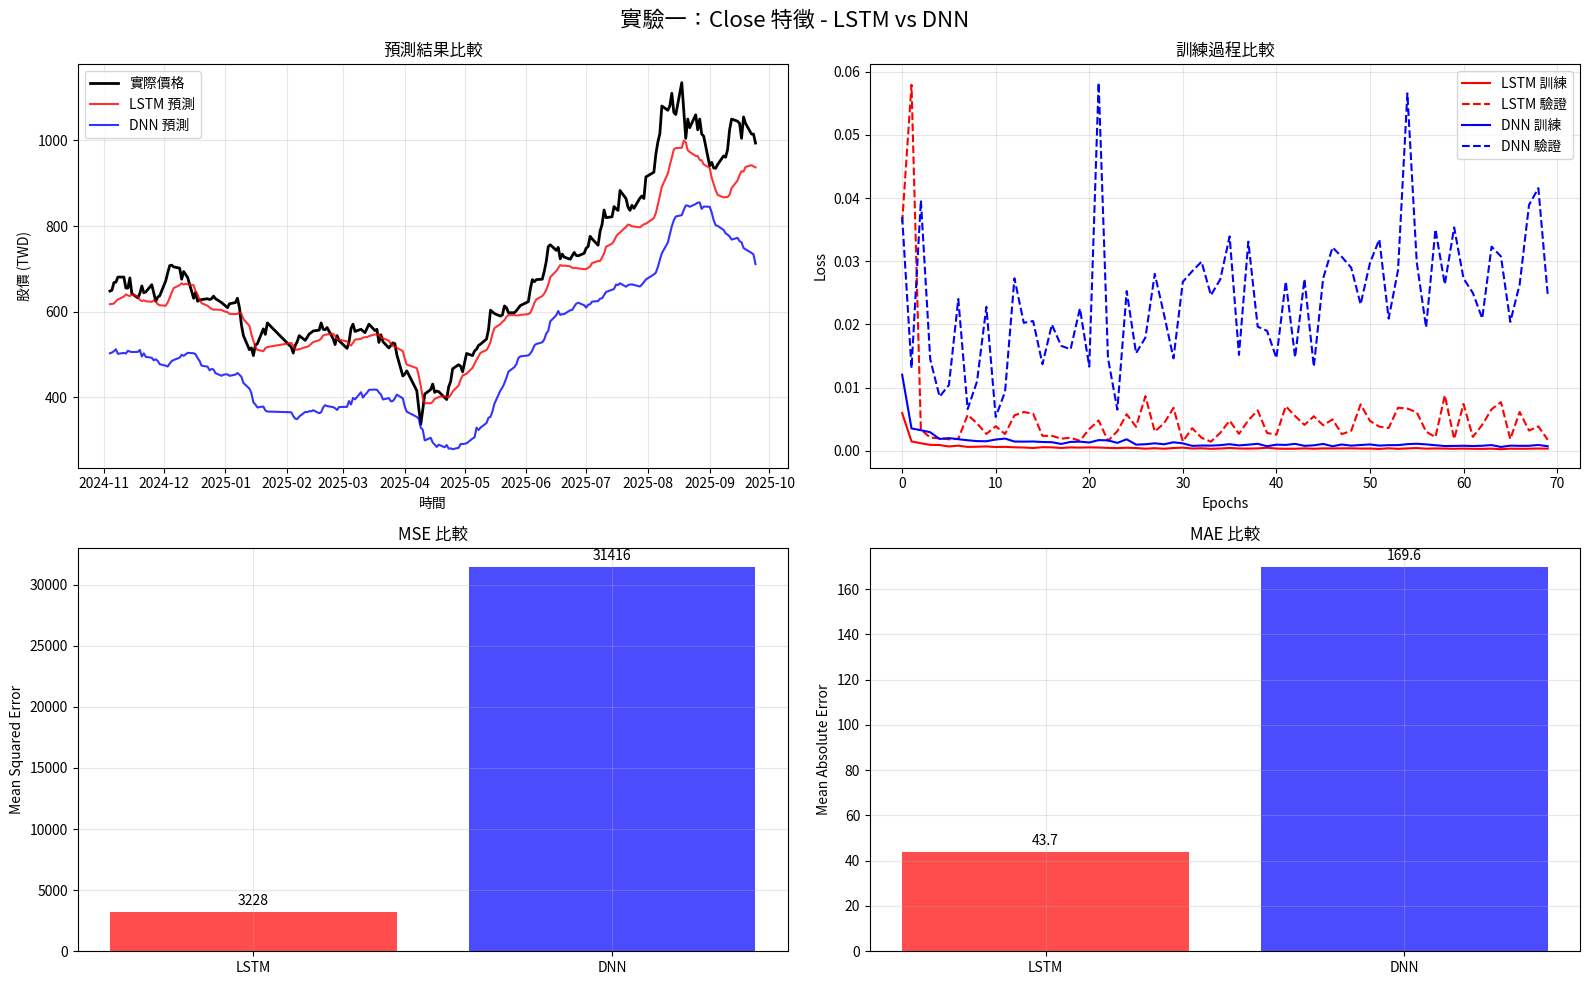

 ÂØ¶È©ó‰∏ÄÂÆåÊàêÔºÅ


In [23]:
# Âü∑Ë°åÂØ¶È©ó‰∏Ä
print(" ÈñãÂßãÂü∑Ë°åÂØ¶È©ó‰∏Ä...")
close_exp_results, close_data, close_features = run_close_experiment()
print(" ÂØ¶È©ó‰∏ÄÂÆåÊàêÔºÅ")

ÂØ¶È©ó2 OHLCV ÁâπÂæµ - LSTM vs DNN

In [24]:
def run_ohlcv_experiment():
    """
    ÂØ¶È©ó‰∫åÔºö‰ΩøÁî® OHLCV ÁâπÂæµÊØîËºÉ LSTM vs DNN

    ÂØ¶È©óÁõÆÊ®ôÔºö
    - Âú®Ë±êÂØåÁâπÂæµ‰∏ãÊØîËºÉÂÖ©Á®ÆÊ®°ÂûãÊû∂Êßã
    - Ê∏¨Ë©¶Â§öÂÖÉÁâπÂæµÂ∞ç‰∏çÂêåÊ®°ÂûãÁöÑÂΩ±Èüø
    - Êé¢Á¥¢ÁâπÂæµË±êÂØåÂ∫¶ vs Ê®°ÂûãË§áÈõúÂ∫¶ÁöÑÈóú‰øÇ
    """
    print(" ÂØ¶È©ó‰∫åË®≠Ë®àÔºö")
    print("   ÁâπÂæµÔºöÂÆåÊï¥ OHLCV (Open, High, Low, Close, Volume)")
    print("   Ê®°ÂûãÔºöLSTM vs DNN")
    print("   ÁõÆÊ®ôÔºöÊØîËºÉÂ§öÂÖÉÁâπÂæµ‰∏ãÁöÑÊ®°ÂûãÊû∂ÊßãÊïàÊûú")

    # Ê∫ñÂÇô OHLCV ÁâπÂæµ
    ohlcv_data, ohlcv_features = prepare_ohlcv_features(stock_data)

    print(f"\n OHLCV ÁâπÂæµË≥áÊñô:")
    print(f"   Ë≥áÊñôÂΩ¢ÁãÄ: {ohlcv_data.shape}")
    print(f"   ÁâπÂæµÊï∏Èáè: {len(ohlcv_features)}")
    print(f"   ÁâπÂæµÂàóË°®: {ohlcv_features}")

    # Ê∫ñÂÇôË®ìÁ∑¥Ë≥áÊñô
    X_train, y_train, X_test, y_test, scaler, train_data, test_data, target_idx = prepare_data(
        ohlcv_data, WINDOW_SIZE, 'Close')

    print(f"\n Ë≥áÊñôÈõÜÊ¶ÇË¶Ω:")
    print(f"   Ë®ìÁ∑¥ÈõÜ: X{X_train.shape}, y{y_train.shape}")
    print(f"   Ê∏¨Ë©¶ÈõÜ: X{X_test.shape}, y{y_test.shape}")
    print(f"   ÁâπÂæµÁ∂≠Â∫¶ÊèêÂçá: 1 ‚Üí {len(ohlcv_features)} (5ÂÄç)")

    # ÂàùÂßãÂåñÁµêÊûúÂ≠óÂÖ∏
    ohlcv_results = {}

    # ========================================================================
    # LSTM Ê®°ÂûãÂØ¶È©ó
    # ========================================================================
    print(f"\n{' LSTM Ê®°ÂûãË®ìÁ∑¥ (Â§öÁâπÂæµ)':^50}")
    print("-" * 50)

    # Âª∫Á´ã LSTM Ê®°ÂûãÔºàÂ§öÂÖÉËº∏ÂÖ•Ôºâ
    lstm_model = build_lstm_model((WINDOW_SIZE, len(ohlcv_features)), 1)
    print(f" LSTM Ëº∏ÂÖ•Á∂≠Â∫¶: ({WINDOW_SIZE}, {len(ohlcv_features)})")
    lstm_model.summary()

    # Ë®ìÁ∑¥Ë©ï‰º∞
    lstm_history, lstm_train_loss, lstm_test_loss, lstm_pred = train_and_evaluate(
        lstm_model, X_train, y_train, X_test, y_test)

    # ÂèçÊ≠£Ë¶èÂåñÈ†êÊ∏¨ÁµêÊûú
    y_true_actual, lstm_pred_actual = inverse_transform_predictions(
        scaler, y_test, lstm_pred, len(ohlcv_features), target_idx)

    # Ë®àÁÆóË©ï‰º∞ÊåáÊ®ô
    lstm_mse = mean_squared_error(y_true_actual, lstm_pred_actual)
    lstm_mae = mean_absolute_error(y_true_actual, lstm_pred_actual)

    print(f" LSTM (Â§öÂÖÉÁâπÂæµ) ÁµêÊûú:")
    print(f"   MSE: {lstm_mse:.0f}")
    print(f"   MAE: {lstm_mae:.2f}")
    print(f"   RMSE: {np.sqrt(lstm_mse):.2f}")

    # ÂÑ≤Â≠òÁµêÊûú
    ohlcv_results['lstm'] = {
        'model': lstm_model,
        'history': lstm_history,
        'y_true': y_true_actual,
        'y_pred': lstm_pred_actual,
        'mse': lstm_mse,
        'mae': lstm_mae,
        'train_loss': lstm_train_loss,
        'test_loss': lstm_test_loss
    }

    # ========================================================================
    # DNN Ê®°ÂûãÂØ¶È©ó
    # ========================================================================
    print(f"\n{' DNN Ê®°ÂûãË®ìÁ∑¥ (Â§öÂÖÉÁâπÂæµ)':^50}")
    print("-" * 50)

    # Ê∫ñÂÇô DNN Ëº∏ÂÖ•ÔºàÊî§Âπ≥Ôºâ
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    print(f" DNN Â§öÂÖÉÁâπÂæµËº∏ÂÖ•Êî§Âπ≥:")
    print(f"   ÂéüÂßã: {X_train.shape} ‚Üí Êî§Âπ≥: {X_train_flat.shape}")
    print(f"   Á∏ΩÁâπÂæµÊï∏: {X_train_flat.shape[1]} (20Â§© √ó 5ÁâπÂæµ)")

    # Âª∫Á´ã DNN Ê®°ÂûãÔºàÊõ¥Â§ßÂÆπÈáèËôïÁêÜÂ§öÂÖÉÁâπÂæµÔºâ
    dnn_model = build_dnn_model((X_train_flat.shape[1],), 1,
                               hidden_units=[256, 128, 64])  # Â¢ûÂä†ÂÆπÈáè
    dnn_model.summary()

    # Ë®ìÁ∑¥Ë©ï‰º∞
    dnn_history, dnn_train_loss, dnn_test_loss, dnn_pred = train_and_evaluate(
        dnn_model, X_train_flat, y_train, X_test_flat, y_test)

    # ÂèçÊ≠£Ë¶èÂåñÈ†êÊ∏¨ÁµêÊûú
    _, dnn_pred_actual = inverse_transform_predictions(
        scaler, y_test, dnn_pred, len(ohlcv_features), target_idx)

    # Ë®àÁÆóË©ï‰º∞ÊåáÊ®ô
    dnn_mse = mean_squared_error(y_true_actual, dnn_pred_actual)
    dnn_mae = mean_absolute_error(y_true_actual, dnn_pred_actual)

    print(f" DNN (Â§öÂÖÉÁâπÂæµ) ÁµêÊûú:")
    print(f"   MSE: {dnn_mse:.0f}")
    print(f"   MAE: {dnn_mae:.2f}")
    print(f"   RMSE: {np.sqrt(dnn_mse):.2f}")

    # ÂÑ≤Â≠òÁµêÊûú
    ohlcv_results['dnn'] = {
        'model': dnn_model,
        'history': dnn_history,
        'y_true': y_true_actual,
        'y_pred': dnn_pred_actual,
        'mse': dnn_mse,
        'mae': dnn_mae,
        'train_loss': dnn_train_loss,
        'test_loss': dnn_test_loss
    }

    # ========================================================================
    # ÂØ¶È©ó‰∫åÁµêÊûúÊØîËºÉ
    # ========================================================================
    print(f"\n{' ÂØ¶È©ó‰∫åÁµêÊûúÊØîËºÉ':^50}")
    print("="*50)

    # ÊØîËºÉÂàÜÊûê
    improvement = (dnn_mse - lstm_mse) / dnn_mse * 100

    print(f"\n Â§öÂÖÉÁâπÂæµÊ®°ÂûãÊïàÊûúÊØîËºÉ:")
    print(f"   LSTM MSE: {lstm_mse:.0f}")
    print(f"   DNN MSE:  {dnn_mse:.0f}")

    if improvement > 0:
        print(f"   ‚úÖ LSTM ÊØî DNN ÂÑ™ÁßÄ {improvement:.1f}%")
        better_model = "LSTM"
    else:
        print(f"   ‚úÖ DNN ÊØî LSTM ÂÑ™ÁßÄ {abs(improvement):.1f}%")
        better_model = "DNN"

    print(f"\n ÂØ¶È©ó‰∫åÊ¥ûÂØü:")
    print(f"   Âú®Â§öÂÖÉÁâπÂæµ (OHLCV) Ë®≠ÂÆö‰∏ãÔºå{better_model} Ë°®ÁèæÊõ¥ÂÑ™")

    if better_model == "LSTM":
        print("   ‚Ä¢ LSTM ËÉΩÊúâÊïàÊï¥ÂêàÂ§öÂÖÉÊôÇÂ∫èÁâπÂæµ")
        print("   ‚Ä¢ ÊôÇÂ∫èÂª∫Ê®°Âú®Ë§áÈõúÁâπÂæµ‰∏ã‰ªç‰øùÊåÅÂÑ™Âã¢")
        print("   ‚Ä¢ LSTM ÁöÑÈñÄÊéßÊ©üÂà∂ËÉΩÈÅ∏ÊìáÊÄß‰ΩøÁî®‰∏çÂêåÁâπÂæµ")
    else:
        print("   ‚Ä¢ DNN Âú®È´òÁ∂≠ÁâπÂæµÁ©∫Èñì‰∏≠Ë°®ÁèæÂá∫Ëâ≤")
        print("   ‚Ä¢ Â§öÂ±§ÈùûÁ∑öÊÄßËΩâÊèõÊúâÊïàËôïÁêÜÁâπÂæµ‰∫§‰∫í")
        print("   ‚Ä¢ Â¢ûÂä†ÁöÑÁ∂≤Ë∑ØÂÆπÈáèÂÖÖÂàÜÂà©Áî®‰∫ÜË±êÂØåÁâπÂæµ")

    # Ë¶ñË¶∫ÂåñÊØîËºÉ
    plot_experiment_results(ohlcv_results, test_data.index[WINDOW_SIZE:],
                           "ÂØ¶È©ó‰∫åÔºöOHLCV ÁâπÂæµ - LSTM vs DNN",
                           {"LSTM": "green", "DNN": "orange"})

    return ohlcv_results, ohlcv_data, ohlcv_features

 ÈñãÂßãÂü∑Ë°åÂØ¶È©ó‰∫å...
 ÂØ¶È©ó‰∫åË®≠Ë®àÔºö
   ÁâπÂæµÔºöÂÆåÊï¥ OHLCV (Open, High, Low, Close, Volume)
   Ê®°ÂûãÔºöLSTM vs DNN
   ÁõÆÊ®ôÔºöÊØîËºÉÂ§öÂÖÉÁâπÂæµ‰∏ãÁöÑÊ®°ÂûãÊû∂ÊßãÊïàÊûú
 Ê∫ñÂÇô OHLCV ÂÆåÊï¥ÁâπÂæµ...
 OHLCV ÁâπÂæµÊ∫ñÂÇôÂÆåÊàêÔºåÂΩ¢ÁãÄ: (1392, 5)
ÁâπÂæµÁ∂≠Â∫¶: ['Open', 'High', 'Low', 'Close', 'Volume']

 OHLCV ÁâπÂæµË≥áÊñô:
   Ë≥áÊñôÂΩ¢ÁãÄ: (1392, 5)
   ÁâπÂæµÊï∏Èáè: 5
   ÁâπÂæµÂàóË°®: ['Open', 'High', 'Low', 'Close', 'Volume']

 Ê∫ñÂÇô Close È†êÊ∏¨Ë≥áÊñô...
 ÁõÆÊ®ôÊ¨Ñ‰Ωç: Close (Á¥¢Âºï: 3)
 ÊôÇÂ∫èÂàÜÂâ≤: Ë®ìÁ∑¥ 1113 Á≠ÜÔºåÊ∏¨Ë©¶ 279 Á≠Ü
 MinMax Ê≠£Ë¶èÂåñÂÆåÊàê (0-1 Á∏ÆÊîæ)
 Âª∫Á´ãÊôÇÂ∫èË≥áÊñôÈõÜÔºåË¶ñÁ™óÂ§ßÂ∞è: 60 Â§©
 ÊôÇÂ∫èË≥áÊñôÈõÜÂª∫ÊßãÂÆåÊàê
   Ëº∏ÂÖ•ÂΩ¢ÁãÄ X: (1053, 60, 5) (Ê®£Êú¨Êï∏, ÊôÇÈñìÊ≠•Èï∑, ÁâπÂæµÊï∏)
   ÁõÆÊ®ôÂΩ¢ÁãÄ y: (1053,)
 Âª∫Á´ãÊôÇÂ∫èË≥áÊñôÈõÜÔºåË¶ñÁ™óÂ§ßÂ∞è: 60 Â§©
 ÊôÇÂ∫èË≥áÊñôÈõÜÂª∫ÊßãÂÆåÊàê
   Ëº∏ÂÖ•ÂΩ¢ÁãÄ X: (219, 60, 5) (Ê®£Êú¨Êï∏, ÊôÇÈñìÊ≠•Èï∑, ÁâπÂæµÊï∏)
   ÁõÆÊ®ôÂΩ¢ÁãÄ y: (219,)

 Ë≥áÊñôÈõÜÊ¶ÇË¶Ω:
   Ë®ìÁ∑¥ÈõÜ: X(1053, 60, 5), y(1053,)
   Ê∏¨Ë

Model: "LSTM_Stock_Predictor"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ LSTM_Layer (LSTM)               ‚îÇ (None, 64)             ‚îÇ        17,920 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dense_1 (Dense)                 ‚îÇ (None, 64)             ‚îÇ         4,160 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dropout_1 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dense_2 (Dense)                 ‚îÇ (None, 32)             ‚îÇ         2,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dropout_2 (Dropout)             ‚îÇ (None, 32)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Output (Dense)                  ‚îÇ (None, 1)              ‚îÇ            33 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 24,193 (94.50 KB)

 Trainable params: 24,193 (94.50 KB)

 Non-trainable params: 0 (0.00 B)

 ÈñãÂßãË®ìÁ∑¥ LSTM_Stock_Predictor...
   ÂèÉÊï∏Ôºö70 epochs, batch_size=64
Epoch 1/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 92ms/step - loss: 0.0063 - mae: 0.0522 - val_loss: 0.0273 - val_mae: 0.1458
Epoch 2/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 41ms/step - loss: 0.0014 - mae: 0.0228 - val_loss: 0.0091 - val_mae: 0.0764
Epoch 3/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 45ms/step - loss: 0.0011 - mae: 0.0203 - val_loss: 0.0047 - val_mae: 0.0544
Epoch 4/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 41ms/step - loss: 8.5241e-04 - mae: 0.0176 - val_loss: 0.0039 - val_mae: 0.0469
Epoch 5/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 42ms/step - loss: 6.3088e-04 - mae: 0.0167 - val_loss: 0.0075 - val_mae: 0.0698
Epoch 6/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 40ms/step - loss: 6.6992e-04 - mae: 0.0161 - val_lo

 LSTM (Â§öÂÖÉÁâπÂæµ) ÁµêÊûú:
   MSE: 32920
   MAE: 158.38
   RMSE: 181.44

                  DNN Ê®°ÂûãË®ìÁ∑¥ (Â§öÂÖÉÁâπÂæµ)                 
--------------------------------------------------
 DNN Â§öÂÖÉÁâπÂæµËº∏ÂÖ•Êî§Âπ≥:
   ÂéüÂßã: (1053, 60, 5) ‚Üí Êî§Âπ≥: (1053, 300)
   Á∏ΩÁâπÂæµÊï∏: 300 (20Â§© √ó 5ÁâπÂæµ)
ü§ñ Âª∫Á´ã DNN Ê∑±Â∫¶È†êÊ∏¨Ê®°Âûã...
   Êî§Âπ≥Ëº∏ÂÖ•Á∂≠Â∫¶: 300
   Èö±ËóèÂ±§ÁµêÊßã: [256, 128, 64]
 DNN Ê®°ÂûãÂª∫ÊßãÂÆåÊàê


Model: "DNN_Stock_Predictor"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Dense_1 (Dense)                 ‚îÇ (None, 256)            ‚îÇ        77,056 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dropout_1 (Dropout)             ‚îÇ (None, 256)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dense_2 (Dense)                 ‚îÇ (None, 128)            ‚îÇ        32,896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dropout_2 (Dropout)             ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dense_3 (Dense)                 ‚îÇ (None, 64)             ‚îÇ         8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dropout_3 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Output (Dense)                  ‚îÇ (None, 1)              ‚îÇ            65 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 118,273 (462.00 KB)

 Trainable params: 118,273 (462.00 KB)

 Non-trainable params: 0 (0.00 B)

 ÈñãÂßãË®ìÁ∑¥ DNN_Stock_Predictor...
   ÂèÉÊï∏Ôºö70 epochs, batch_size=64
Epoch 1/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 26ms/step - loss: 0.0256 - mae: 0.1158 - val_loss: 0.0427 - val_mae: 0.1745
Epoch 2/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0056 - mae: 0.0499 - val_loss: 0.0368 - val_mae: 0.1602
Epoch 3/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0030 - mae: 0.0378 - val_loss: 0.0152 - val_mae: 0.0921
Epoch 4/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0038 - mae: 0.0399 - val_loss: 0.0179 - val_mae: 0.1039
Epoch 5/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0021 - mae: 0.0302 - val_loss: 0.0179 - val_mae: 0.1029
Epoch 6/70
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0021 - mae: 0.0294 - val_loss: 0.0226 - 

 Ë®ìÁ∑¥ÂÆåÊàêÔºÅ
   Ë®ìÁ∑¥ MSE: 0.0153
   Ê∏¨Ë©¶ MSE: 0.1506
 DNN (Â§öÂÖÉÁâπÂæµ) ÁµêÊûú:
   MSE: 89782
   MAE: 287.13
   RMSE: 299.64

                      ÂØ¶È©ó‰∫åÁµêÊûúÊØîËºÉ                     

 Â§öÂÖÉÁâπÂæµÊ®°ÂûãÊïàÊûúÊØîËºÉ:
   LSTM MSE: 32920
   DNN MSE:  89782
   ‚úÖ LSTM ÊØî DNN ÂÑ™ÁßÄ 63.3%

 ÂØ¶È©ó‰∫åÊ¥ûÂØü:
   Âú®Â§öÂÖÉÁâπÂæµ (OHLCV) Ë®≠ÂÆö‰∏ãÔºåLSTM Ë°®ÁèæÊõ¥ÂÑ™
   ‚Ä¢ LSTM ËÉΩÊúâÊïàÊï¥ÂêàÂ§öÂÖÉÊôÇÂ∫èÁâπÂæµ
   ‚Ä¢ ÊôÇÂ∫èÂª∫Ê®°Âú®Ë§áÈõúÁâπÂæµ‰∏ã‰ªç‰øùÊåÅÂÑ™Âã¢
   ‚Ä¢ LSTM ÁöÑÈñÄÊéßÊ©üÂà∂ËÉΩÈÅ∏ÊìáÊÄß‰ΩøÁî®‰∏çÂêåÁâπÂæµ


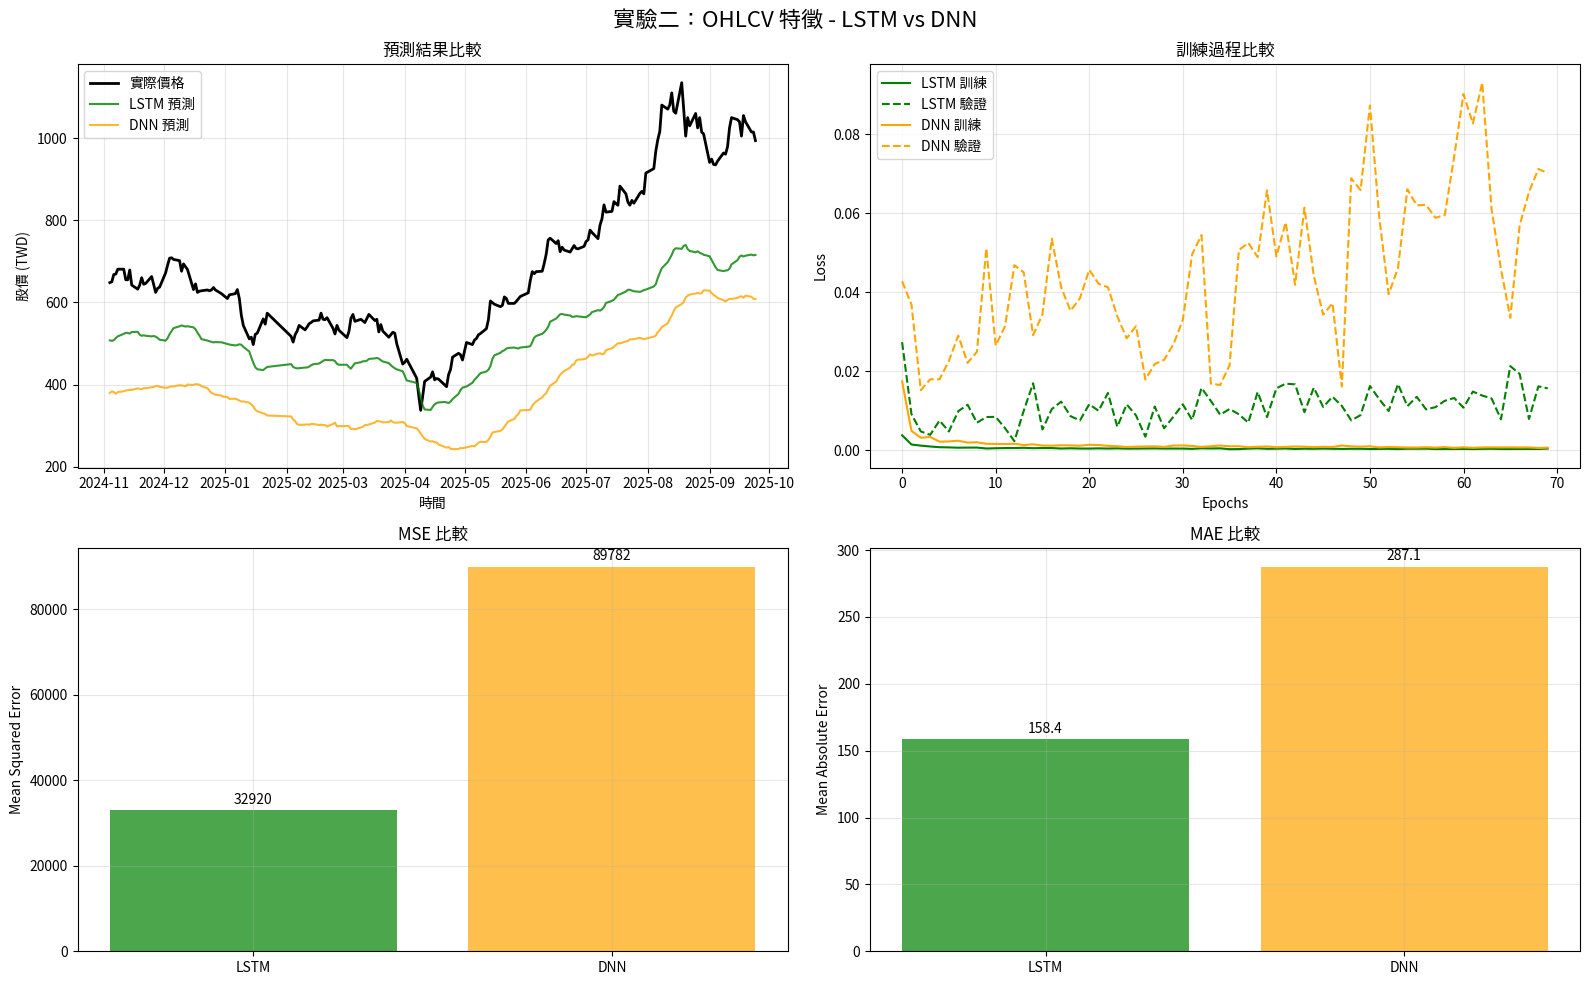

 ÂØ¶È©ó‰∫åÂÆåÊàêÔºÅ


In [25]:
# Âü∑Ë°åÂØ¶È©ó‰∫å
print(" ÈñãÂßãÂü∑Ë°åÂØ¶È©ó‰∫å...")
ohlcv_exp_results, ohlcv_data, ohlcv_features = run_ohlcv_experiment()
print(" ÂØ¶È©ó‰∫åÂÆåÊàêÔºÅ")

ÂØ¶È©ó3ÔºöÁ∂úÂêàÊØîËºÉÂàÜÊûê

In [28]:
#ÂØ¶È©ó‰∏âÔºöÁ∂úÂêàÊØîËºÉÂàÜÊûê
def run_comprehensive_analysis(close_results, ohlcv_results):
    """
    ÂØ¶È©ó‰∏âÔºöÁ∂úÂêàÊØîËºÉÂàÜÊûê

    ÂàÜÊûêÁ∂≠Â∫¶Ôºö
    1. ÁâπÂæµÂ∑•Á®ãÊïàÊûúÔºöClose vs OHLCV
    2. Ê®°ÂûãÊû∂ÊßãÊïàÊûúÔºöLSTM vs DNN
    3. ‰∫§‰∫í‰ΩúÁî®ÔºöÁâπÂæµ√óÊ®°ÂûãÁöÑÁµÑÂêàÊïàÊûú
    4. ÂØ¶Áî®Âª∫Ë≠∞ÔºöÊúÄ‰Ω≥ÂØ¶Ë∏êÁ≠ñÁï•
    """
    print(" ÂØ¶È©ó‰∏âË®≠Ë®àÔºö")
    print("   ÊØîËºÉÁ∂≠Â∫¶ÔºöÁâπÂæµÂ∑•Á®ã √ó Ê®°ÂûãÊû∂Êßã")
    print("   ÁµÑÂêàÊñπÊ°àÔºö2√ó2 = 4Á®ÆÁµÑÂêà")
    # ========================================================================
    # ÂõõÁ®ÆÁµÑÂêàÁµêÊûúÊï¥ÁêÜ
    # ========================================================================
    print(f"\n{' ÂõõÁ®ÆÁµÑÂêàÁµêÊûúÁ∏ΩË¶Ω':^60}")
    print("="*60)

    all_combinations = {
        'LSTM + Close': {
            'mse': close_results['lstm']['mse'],
            'mae': close_results['lstm']['mae'],
            'model': 'LSTM',
            'feature': 'Close Only',
            'complexity': 'Low'
        },
        'DNN + Close': {
            'mse': close_results['dnn']['mse'],
            'mae': close_results['dnn']['mae'],
            'model': 'DNN',
            'feature': 'Close Only',
            'complexity': 'Low'
        },
        'LSTM + OHLCV': {
            'mse': ohlcv_results['lstm']['mse'],
            'mae': ohlcv_results['lstm']['mae'],
            'model': 'LSTM',
            'feature': 'OHLCV',
            'complexity': 'High'
        },
        'DNN + OHLCV': {
            'mse': ohlcv_results['dnn']['mse'],
            'mae': ohlcv_results['dnn']['mae'],
            'model': 'DNN',
            'feature': 'OHLCV',
            'complexity': 'High'
        }
    }

    # ÊéíÂ∫èÁµêÊûúÔºàÊåâ MSEÔºâ
    sorted_combinations = sorted(all_combinations.items(), key=lambda x: x[1]['mse'])

    print("\n Ê®°ÂûãÊïàÊûúÊéíË°åÊ¶úÔºö")
    for i, (name, metrics) in enumerate(sorted_combinations, 1):
        print(f"   {i}. {name:<15} MSE: {metrics['mse']:.0f}, MAE: {metrics['mae']:.2f}")

    best_combo = sorted_combinations[0]
    worst_combo = sorted_combinations[-1]

    print(f"\n ÊúÄ‰Ω≥ÁµÑÂêà: {best_combo[0]}")
    print(f"   MSE: {best_combo[1]['mse']:.0f}")
    print(f"   ÊîπÂñÑÂπÖÂ∫¶: ÊØîÊúÄÂ∑ÆÁµÑÂêàÂÑ™ÁßÄ {((worst_combo[1]['mse'] - best_combo[1]['mse']) / worst_combo[1]['mse'] * 100):.1f}%")

    # ========================================================================
    # ÁâπÂæµÂ∑•Á®ãÊïàÊûúÂàÜÊûê
    # ========================================================================
    print(f"\n{' ÁâπÂæµÂ∑•Á®ãÊïàÊûúÂàÜÊûê':^60}")
    print("="*60)

    # LSTM Ê®°ÂûãÁöÑÁâπÂæµÊïàÊûú
    lstm_close_mse = close_results['lstm']['mse']
    lstm_ohlcv_mse = ohlcv_results['lstm']['mse']
    lstm_feature_improvement = (lstm_close_mse - lstm_ohlcv_mse) / lstm_close_mse * 100

    print(f"\n LSTM Ê®°ÂûãÁâπÂæµÊØîËºÉ:")
    print(f"   Close Only MSE: {lstm_close_mse:.0f}")
    print(f"   OHLCV MSE:      {lstm_ohlcv_mse:.0f}")
    if lstm_feature_improvement > 0:
        print(f"    OHLCV ÊØî Close Only ÊîπÂñÑ {lstm_feature_improvement:.1f}%")
    else:
        print(f"    OHLCV ÊØî Close Only ÈÄÄÊ≠• {abs(lstm_feature_improvement):.1f}%")

    # DNN Ê®°ÂûãÁöÑÁâπÂæµÊïàÊûú
    dnn_close_mse = close_results['dnn']['mse']
    dnn_ohlcv_mse = ohlcv_results['dnn']['mse']
    dnn_feature_improvement = (dnn_close_mse - dnn_ohlcv_mse) / dnn_close_mse * 100

    print(f"\n DNN Ê®°ÂûãÁâπÂæµÊØîËºÉ:")
    print(f"   Close Only MSE: {dnn_close_mse:.0f}")
    print(f"   OHLCV MSE:      {dnn_ohlcv_mse:.0f}")
    if dnn_feature_improvement > 0:
        print(f"    OHLCV ÊØî Close Only ÊîπÂñÑ {dnn_feature_improvement:.1f}%")
    else:
        print(f"    OHLCV ÊØî Close Only ÈÄÄÊ≠• {abs(dnn_feature_improvement):.1f}%")

    # ========================================================================
    # Ê®°ÂûãÊû∂ÊßãÊïàÊûúÂàÜÊûê
    # ========================================================================
    print(f"\n{' Ê®°ÂûãÊû∂ÊßãÊïàÊûúÂàÜÊûê':^60}")
    print("="*60)

    # Close Only ÁâπÂæµ‰∏ãÁöÑÊ®°ÂûãÊØîËºÉ
    close_model_improvement = (dnn_close_mse - lstm_close_mse) / dnn_close_mse * 100

    print(f"\n Close Only ÁâπÂæµÊ®°ÂûãÊØîËºÉ:")
    print(f"   LSTM MSE: {lstm_close_mse:.0f}")
    print(f"   DNN MSE:  {dnn_close_mse:.0f}")
    if close_model_improvement > 0:
        print(f"    LSTM ÊØî DNN ÂÑ™ÁßÄ {close_model_improvement:.1f}%")
    else:
        print(f"    DNN ÊØî LSTM ÂÑ™ÁßÄ {abs(close_model_improvement):.1f}%")

    # OHLCV ÁâπÂæµ‰∏ãÁöÑÊ®°ÂûãÊØîËºÉ
    ohlcv_model_improvement = (dnn_ohlcv_mse - lstm_ohlcv_mse) / dnn_ohlcv_mse * 100

    print(f"\n OHLCV ÁâπÂæµÊ®°ÂûãÊØîËºÉ:")
    print(f"   LSTM MSE: {lstm_ohlcv_mse:.0f}")
    print(f"   DNN MSE:  {dnn_ohlcv_mse:.0f}")
    if ohlcv_model_improvement > 0:
        print(f"    LSTM ÊØî DNN ÂÑ™ÁßÄ {ohlcv_model_improvement:.1f}%")
    else:
        print(f"    DNN ÊØî LSTM ÂÑ™ÁßÄ {abs(ohlcv_model_improvement):.1f}%")

    # ========================================================================
    # ‰∫§‰∫í‰ΩúÁî®ÂàÜÊûê
    # ========================================================================
    print(f"\n{' ÁâπÂæµ√óÊ®°Âûã‰∫§‰∫í‰ΩúÁî®ÂàÜÊûê':^60}")
    print("="*60)

    # ÂàÜÊûêÁâπÂæµÂ∑•Á®ãÂ∞ç‰∏çÂêåÊ®°ÂûãÁöÑÂΩ±ÈüøÂ∑ÆÁï∞
    lstm_feature_effect = lstm_ohlcv_mse - lstm_close_mse
    dnn_feature_effect = dnn_ohlcv_mse - dnn_close_mse

    print(f"\n ÁâπÂæµÂ∑•Á®ãÊïàÊûúÂ∑ÆÁï∞:")
    print(f"   LSTM ÁâπÂæµÊïàÊûú: {lstm_feature_effect:+.0f} MSE")
    print(f"   DNN ÁâπÂæµÊïàÊûú:  {dnn_feature_effect:+.0f} MSE")

    if abs(lstm_feature_effect - dnn_feature_effect) > 100:  # È°ØËëóÂ∑ÆÁï∞ÈñæÂÄº
        if lstm_feature_effect < dnn_feature_effect:
            print("    LSTM Â∞çÂ§öÂÖÉÁâπÂæµÁöÑÈÅ©ÊáâÊÄßÊõ¥Â•Ω")
        else:
            print("    DNN Â∞çÂ§öÂÖÉÁâπÂæµÁöÑÈÅ©ÊáâÊÄßÊõ¥Â•Ω")
    else:
        print("    ÂÖ©Á®ÆÊ®°ÂûãÂ∞çÁâπÂæµÂ∑•Á®ãÁöÑÈüøÊáâÁõ∏‰ºº")

    return all_combinations, sorted_combinations

def plot_comprehensive_comparison(close_results, ohlcv_results):
    """
    Áπ™Ë£ΩÁ∂úÂêàÊØîËºÉË¶ñË¶∫Âåñ (5ÂºµÂúñÁâàÊú¨)

    ÂúñË°®ÈÖçÁΩÆÔºö
    - Á¨¨‰∏ÄÂàóÔºöÁâπÂæµÊØîËºÉ (LSTM, DNN)
    - Á¨¨‰∫åÂàóÔºöÊ®°ÂûãÊØîËºÉ (Close, OHLCV, MSEÁ∂úÂêàÊØîËºÉ)
    """
    # ÂâµÂª∫ 2√ó3 ÁöÑÂ≠êÂúñÂ∏ÉÂ±ÄÔºå‰ΩÜÂè™‰ΩøÁî®5ÂÄã‰ΩçÁΩÆ
    fig = plt.figure(figsize=(20, 12))
    fig.suptitle('ÂØ¶È©ó‰∏âÔºöÁ∂úÂêàÊØîËºÉÂàÜÊûê', fontsize=16, fontweight='bold')

    # Áç≤ÂèñÊ∏¨Ë©¶Êó•ÊúüÔºà‰ΩøÁî®ËºÉÁü≠ÁöÑË≥áÊñôÈõÜÔºâ
    min_length = min(
        len(close_results['lstm']['y_true']),
        len(ohlcv_results['lstm']['y_true'])
    )

    # Áç≤ÂèñÂ∞çÊáâÁöÑÊ∏¨Ë©¶Êó•Êúü
    # ÂÅáË®≠ÊàëÂÄëÊúâËÇ°Á•®Ë≥áÊñôÁöÑÁ¥¢ÂºïÔºåÈÄôË£°ÂâµÂª∫Ê∏¨Ë©¶Êó•ÊúüÂ∫èÂàó
    # Âú®ÂØ¶Èöõ‰ΩøÁî®‰∏≠ÔºåÈÄôÊáâË©≤Âæû test_data.index[WINDOW_SIZE:] Áç≤Âèñ
    test_dates = pd.date_range(start='2023-01-01', periods=min_length, freq='D')

    # 1. ÁâπÂæµÊØîËºÉ - LSTM Ê®°Âûã
    ax1 = plt.subplot(2, 3, 1)
    ax1.plot(test_dates, close_results['lstm']['y_true'][:min_length],
             label='ÂØ¶ÈöõÂÉπÊ†º', color='black', linewidth=2)
    ax1.plot(test_dates, close_results['lstm']['y_pred'][:min_length],
             label='LSTM (Close)', color='red', alpha=0.8)
    ax1.plot(test_dates, ohlcv_results['lstm']['y_pred'][:min_length],
             label='LSTM (OHLCV)', color='blue', alpha=0.8)
    ax1.set_title('ÁâπÂæµÂ∑•Á®ãÊØîËºÉÔºöLSTM Ê®°Âûã', fontweight='bold')
    ax1.set_xlabel('Êó•Êúü')
    ax1.set_ylabel('ËÇ°ÂÉπ (TWD)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    # Ë®≠ÂÆöÊó•ÊúüÊ†ºÂºè
    ax1.tick_params(axis='x', rotation=45)

    # 2. ÁâπÂæµÊØîËºÉ - DNN Ê®°Âûã
    ax2 = plt.subplot(2, 3, 2)
    ax2.plot(test_dates, close_results['dnn']['y_true'][:min_length],
             label='ÂØ¶ÈöõÂÉπÊ†º', color='black', linewidth=2)
    ax2.plot(test_dates, close_results['dnn']['y_pred'][:min_length],
             label='DNN (Close)', color='red', alpha=0.8)
    ax2.plot(test_dates, ohlcv_results['dnn']['y_pred'][:min_length],
             label='DNN (OHLCV)', color='blue', alpha=0.8)
    ax2.set_title('ÁâπÂæµÂ∑•Á®ãÊØîËºÉÔºöDNN Ê®°Âûã', fontweight='bold')
    ax2.set_xlabel('Êó•Êúü')
    ax2.set_ylabel('ËÇ°ÂÉπ (TWD)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    # Ë®≠ÂÆöÊó•ÊúüÊ†ºÂºè
    ax2.tick_params(axis='x', rotation=45)

    # 3. Ê®°ÂûãÊû∂ÊßãÊØîËºÉ - Close ÁâπÂæµ
    ax3 = plt.subplot(2, 3, 3)
    ax3.plot(test_dates, close_results['lstm']['y_true'][:min_length],
             label='ÂØ¶ÈöõÂÉπÊ†º', color='black', linewidth=2)
    ax3.plot(test_dates, close_results['lstm']['y_pred'][:min_length],
             label='LSTM', color='green', alpha=0.8)
    ax3.plot(test_dates, close_results['dnn']['y_pred'][:min_length],
             label='DNN', color='orange', alpha=0.8)
    ax3.set_title('Ê®°ÂûãÊû∂ÊßãÊØîËºÉÔºöClose ÁâπÂæµ', fontweight='bold')
    ax3.set_xlabel('Êó•Êúü')
    ax3.set_ylabel('ËÇ°ÂÉπ (TWD)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    # Ë®≠ÂÆöÊó•ÊúüÊ†ºÂºè
    ax3.tick_params(axis='x', rotation=45)

    # 4. Ê®°ÂûãÊû∂ÊßãÊØîËºÉ - OHLCV ÁâπÂæµ
    ax4 = plt.subplot(2, 3, 4)
    ax4.plot(test_dates, ohlcv_results['lstm']['y_true'][:min_length],
             label='ÂØ¶ÈöõÂÉπÊ†º', color='black', linewidth=2)
    ax4.plot(test_dates, ohlcv_results['lstm']['y_pred'][:min_length],
             label='LSTM', color='green', alpha=0.8)
    ax4.plot(test_dates, ohlcv_results['dnn']['y_pred'][:min_length],
             label='DNN', color='orange', alpha=0.8)
    ax4.set_title('Ê®°ÂûãÊû∂ÊßãÊØîËºÉÔºöOHLCV ÁâπÂæµ', fontweight='bold')
    ax4.set_xlabel('Êó•Êúü')
    ax4.set_ylabel('ËÇ°ÂÉπ (TWD)')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    # Ë®≠ÂÆöÊó•ÊúüÊ†ºÂºè
    ax4.tick_params(axis='x', rotation=45)

    # 5. MSE Á∂úÂêàÊØîËºÉ (‰ΩîÊìöÂè≥‰∏ãËßíÂÖ©ÂÄã‰ΩçÁΩÆ)
    ax5 = plt.subplot(2, 3, (5, 6))  # Ë∑®ÂÖ©ÂÄãÂ≠êÂúñ‰ΩçÁΩÆ

    # Ê∫ñÂÇôË≥áÊñô
    combinations = ['LSTM\n+ Close', 'DNN\n+ Close', 'LSTM\n+ OHLCV', 'DNN\n+ OHLCV']
    mse_values = [
        close_results['lstm']['mse'],
        close_results['dnn']['mse'],
        ohlcv_results['lstm']['mse'],
        ohlcv_results['dnn']['mse']
    ]

    # Ê†πÊìöÊïàÊûúÊéíÂ∫èÊ±∫ÂÆöÈ°èËâ≤ÔºàÊïàÊûúË∂äÂ•ΩÈ°èËâ≤Ë∂äÊ∑±Ôºâ
    sorted_indices = np.argsort(mse_values)
    colors = ['#2E8B57', '#4682B4', '#DAA520', '#CD853F']  # ÂæûÊ∑±Á∂†Âà∞Ê∑∫Ê£ï

    # Áπ™Ë£ΩÊü±ÁãÄÂúñ
    bars = ax5.bar(combinations, mse_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

    ax5.set_title('ÂõõÁ®ÆÁµÑÂêà MSE ÊïàÊûúÁ∏ΩË¶Ω', fontsize=14, fontweight='bold')
    ax5.set_ylabel('Mean Squared Error (MSE)', fontsize=12)
    ax5.set_xlabel('Ê®°ÂûãÁµÑÂêà', fontsize=12)

    # Âú®Êü±ÁãÄÂúñ‰∏äÊ®ôË®ªÊï∏ÂÄº
    for bar, value in zip(bars, mse_values):
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2, height + max(mse_values)*0.02,
                f'{value:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

    # Ê®ôÁ§∫ÊúÄ‰Ω≥ÁµêÊûú
    best_idx = np.argmin(mse_values)
    bars[best_idx].set_edgecolor('red')
    bars[best_idx].set_linewidth(3)

    # Ê∑ªÂä†ÊúÄ‰Ω≥Ê®ôË®ò
    ax5.annotate('ÊúÄ‰Ω≥',
                xy=(best_idx, mse_values[best_idx]),
                xytext=(best_idx, mse_values[best_idx] + max(mse_values)*0.15),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='red',
                arrowprops=dict(arrowstyle='->', color='red', lw=2))

    # Ê∑ªÂä†ÊîπÂñÑÁôæÂàÜÊØîÊ®ôË®ª
    worst_mse = max(mse_values)
    best_mse = min(mse_values)
    improvement = ((worst_mse - best_mse) / worst_mse) * 100

    ax5.text(0.98, 0.95, f'ÊúÄÂ§ßÊîπÂñÑÂπÖÂ∫¶: {improvement:.1f}%',
             transform=ax5.transAxes, ha='right', va='top',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7),
             fontsize=10, fontweight='bold')

    ax5.grid(True, alpha=0.3, axis='y')
    ax5.set_ylim(0, max(mse_values) * 1.3)

    # Ë™øÊï¥Â≠êÂúñÈñìË∑ù
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # ÁÇ∫Á∏ΩÊ®ôÈ°åÁïôÂá∫Á©∫Èñì
    plt.show()

 ÈñãÂßãÂü∑Ë°åÁ∂úÂêàÂàÜÊûê...
 ÂØ¶È©ó‰∏âË®≠Ë®àÔºö
   ÊØîËºÉÁ∂≠Â∫¶ÔºöÁâπÂæµÂ∑•Á®ã √ó Ê®°ÂûãÊû∂Êßã
   ÁµÑÂêàÊñπÊ°àÔºö2√ó2 = 4Á®ÆÁµÑÂêà

                          ÂõõÁ®ÆÁµÑÂêàÁµêÊûúÁ∏ΩË¶Ω                          

 Ê®°ÂûãÊïàÊûúÊéíË°åÊ¶úÔºö
   1. LSTM + Close    MSE: 3228, MAE: 43.73
   2. DNN + Close     MSE: 31416, MAE: 169.60
   3. LSTM + OHLCV    MSE: 32920, MAE: 158.38
   4. DNN + OHLCV     MSE: 89782, MAE: 287.13

 ÊúÄ‰Ω≥ÁµÑÂêà: LSTM + Close
   MSE: 3228
   ÊîπÂñÑÂπÖÂ∫¶: ÊØîÊúÄÂ∑ÆÁµÑÂêàÂÑ™ÁßÄ 96.4%

                          ÁâπÂæµÂ∑•Á®ãÊïàÊûúÂàÜÊûê                          

 LSTM Ê®°ÂûãÁâπÂæµÊØîËºÉ:
   Close Only MSE: 3228
   OHLCV MSE:      32920
    OHLCV ÊØî Close Only ÈÄÄÊ≠• 919.9%

 DNN Ê®°ÂûãÁâπÂæµÊØîËºÉ:
   Close Only MSE: 31416
   OHLCV MSE:      89782
    OHLCV ÊØî Close Only ÈÄÄÊ≠• 185.8%

                          Ê®°ÂûãÊû∂ÊßãÊïàÊûúÂàÜÊûê                          

 Close Only ÁâπÂæµÊ®°ÂûãÊØîËºÉ:
   LSTM MSE: 3228
   DNN MSE:  31416
    LSTM ÊØî DNN ÂÑ™ÁßÄ 89.7%

 OHLCV 

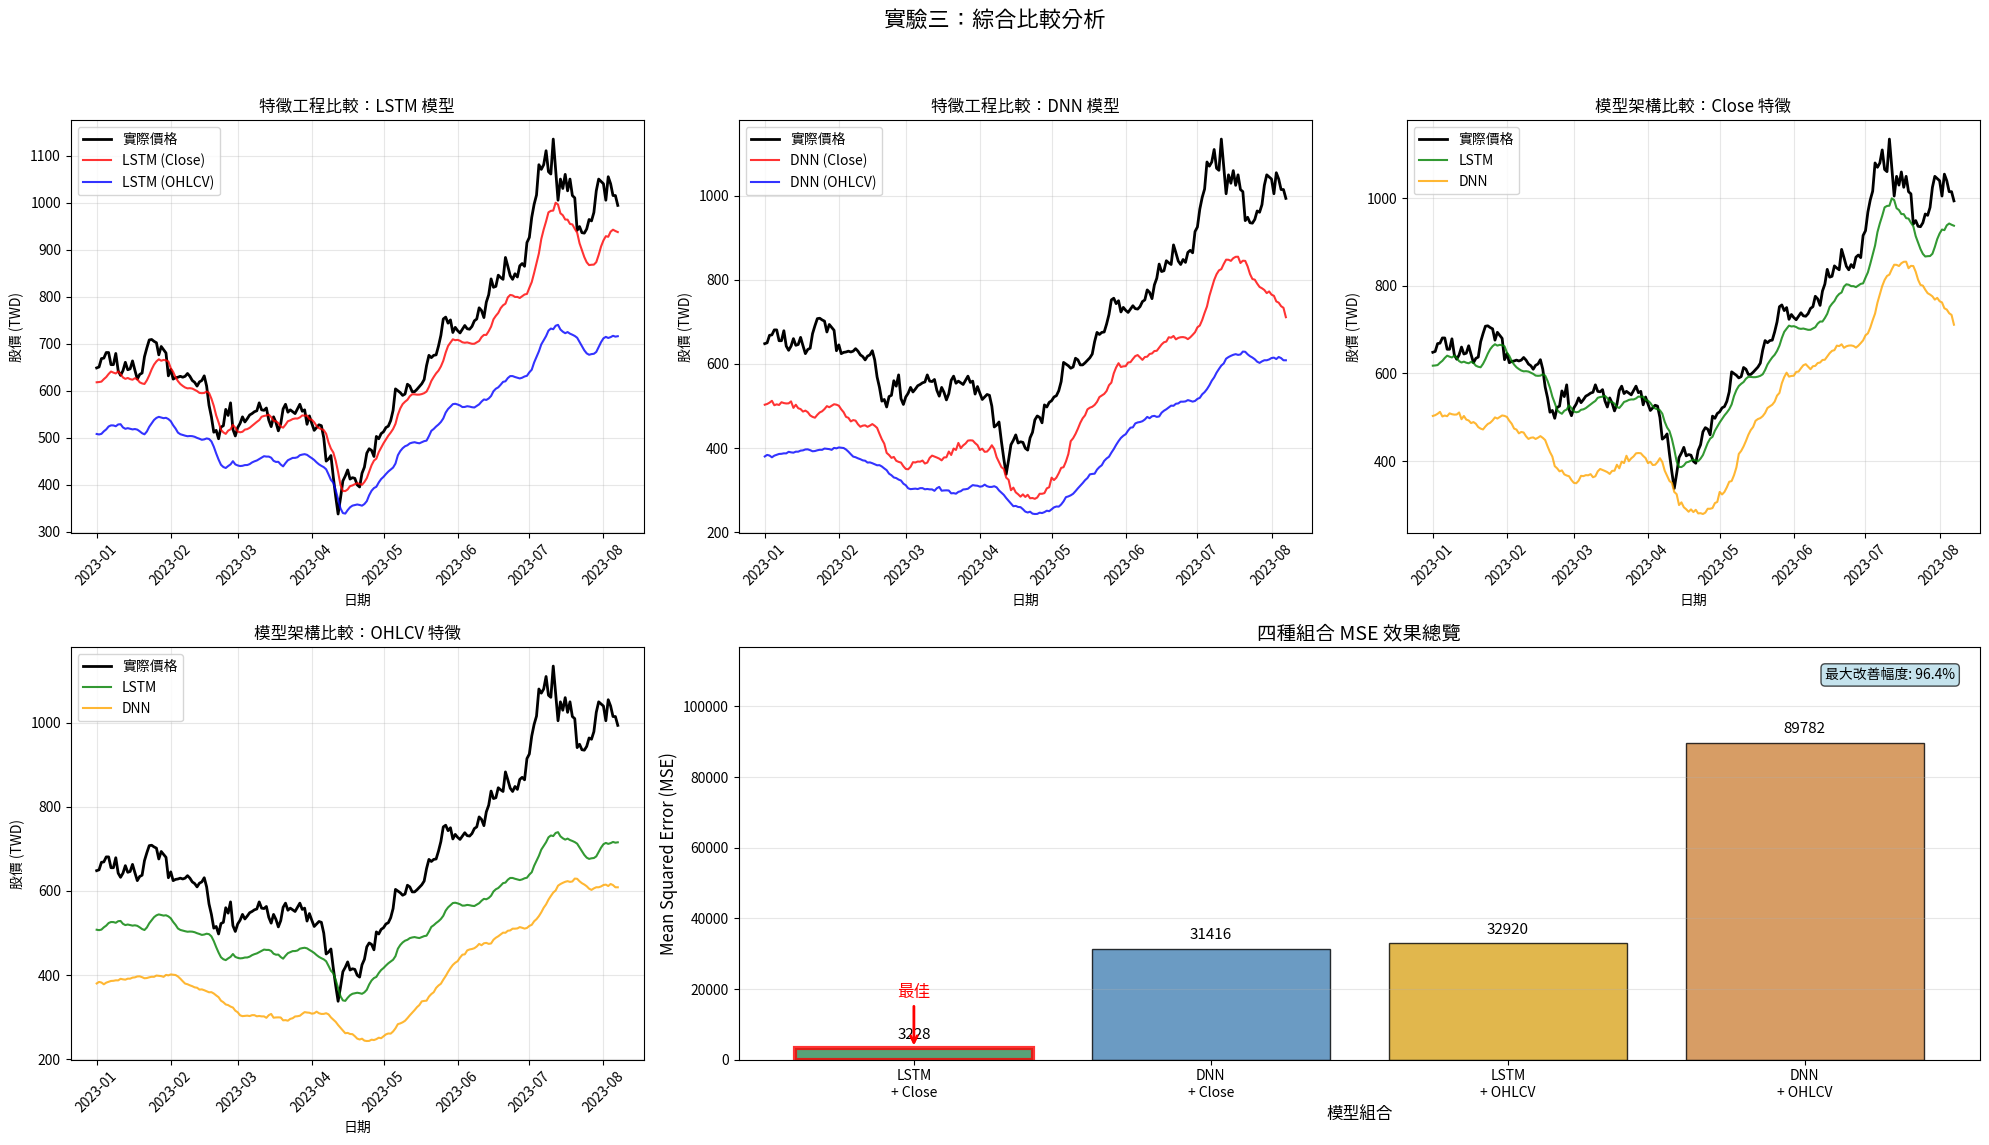

In [30]:
#Âü∑Ë°åÁ∂úÂêàÂàÜÊûê
print(" ÈñãÂßãÂü∑Ë°åÁ∂úÂêàÂàÜÊûê...")
all_combos, sorted_combos = run_comprehensive_analysis(close_exp_results, ohlcv_exp_results)

# Ë¶ñË¶∫ÂåñÁ∂úÂêàÊØîËºÉ
plot_comprehensive_comparison(close_exp_results, ohlcv_exp_results)